<a href="https://colab.research.google.com/github/lmdss1294/My_section1_project/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# csv 파일 읽어들이기
df = pd.read_csv('https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv')
df.drop_duplicates(['Name', 'Platform','Year'])


Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   
16597       16598                        The King of Fighters '95       PS   

         Year      Genre                    Publisher NA_Sales EU_Sales  \
0      2008.0     Action                    Destineer     0.04        0   
1      2009.0     Action           Namco Bandai Games     0.17        0   
2      2010.0  Adventure                    Alchemist        0        0   
3      2010.0       Misc                    Zoo Games     0.04        0   
4      2010.0   Platform                  D3Publisher     0.12     0.09   
...       ...        ...                          ...      ...      ...   
16593  2006.0   Platform                Vivendi Games     0.15     0.04   
16594  2005.0     Action            Rising Star Games     0.01        0   
16595  2015.0     Sports         Take-Two Interactive     0.44     0.19   
16596  2013.0     Action                   Tecmo Koei     0.05     0.05   
16597  1996.0   Fighting  Sony Computer Entertainment        0        0   

      JP_Sales Other_Sales  
0            0           0  
1            0        0.01  
2         0.02           0  
3            0           0  
4            0        0.04  
...        ...         ...  
16593        0        0.01  
16594        0           0  
16595     0.03        0.13  
16596     0.25        0.03  
16597     0.16        0.01  

[16596 rows x 10 columns]

In [ ]:
df

Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   
16597       16598                        The King of Fighters '95       PS   

         Year      Genre                    Publisher NA_Sales EU_Sales  \
0      2008.0     Action                    Destineer     0.04        0   
1      2009.0     Action           Namco Bandai Games     0.17        0   
2      2010.0  Adventure                    Alchemist        0        0   
3      2010.0       Misc                    Zoo Games     0.04        0   
4      2010.0   Platform                  D3Publisher     0.12     0.09   
...       ...        ...                          ...      ...      ...   
16593  2006.0   Platform                Vivendi Games     0.15     0.04   
16594  2005.0     Action            Rising Star Games     0.01        0   
16595  2015.0     Sports         Take-Two Interactive     0.44     0.19   
16596  2013.0     Action                   Tecmo Koei     0.05     0.05   
16597  1996.0   Fighting  Sony Computer Entertainment        0        0   

      JP_Sales Other_Sales  
0            0           0  
1            0        0.01  
2         0.02           0  
3            0           0  
4            0        0.04  
...        ...         ...  
16593        0        0.01  
16594        0           0  
16595     0.03        0.13  
16596     0.25        0.03  
16597     0.16        0.01  

[16598 rows x 10 columns]

결측치 확인

In [ ]:
df = df.drop_duplicates(['Name', 'Platform','Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16596 non-null  int64  
 1   Name         16596 non-null  object 
 2   Platform     16596 non-null  object 
 3   Year         16326 non-null  float64
 4   Genre        16546 non-null  object 
 5   Publisher    16538 non-null  object 
 6   NA_Sales     16596 non-null  object 
 7   EU_Sales     16596 non-null  object 
 8   JP_Sales     16596 non-null  object 
 9   Other_Sales  16596 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


결측치는 이름이 같고 값이 존재하는 데이터로 대체한다. 만약 이름이 같은 데이터가 존재하지 않으면 drop한다.


In [ ]:
df = df.groupby('Name').apply(lambda x: x.fillna(method='ffill'))

# 결측치가 있는 데이터 drop
df = df.dropna()


In [ ]:
def convert_sales(s):
    if s[-1] == 'K':
        return float(s[:-1]) * 0.001
    elif s[-1] == 'M':
        return float(s[:-1])
    else:
        return float(s)

df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales)
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales)


# 데이터 타입 확인하기
print(df.dtypes)

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


In [ ]:
df["Total_Sales"]=df["NA_Sales"]+df["EU_Sales"]+df["JP_Sales"]+df["Other_Sales"]

In [ ]:
df

Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   
16597       16598                        The King of Fighters '95       PS   

         Year      Genre                    Publisher  NA_Sales  EU_Sales  \
0      2008.0     Action                    Destineer      0.04      0.00   
1      2009.0     Action           Namco Bandai Games      0.17      0.00   
2      2010.0  Adventure                    Alchemist      0.00      0.00   
3      2010.0       Misc                    Zoo Games      0.04      0.00   
4      2010.0   Platform                  D3Publisher      0.12      0.09   
...       ...        ...                          ...       ...       ...   
16593  2006.0   Platform                Vivendi Games      0.15      0.04   
16594  2005.0     Action            Rising Star Games      0.01      0.00   
16595  2015.0     Sports         Take-Two Interactive      0.44      0.19   
16596  2013.0     Action                   Tecmo Koei      0.05      0.05   
16597  1996.0   Fighting  Sony Computer Entertainment      0.00      0.00   

       JP_Sales  Other_Sales  Total_Sales  
0          0.00         0.00         0.04  
1          0.00         0.01         0.18  
2          0.02         0.00         0.02  
3          0.00         0.00         0.04  
4          0.00         0.04         0.25  
...         ...          ...          ...  
16593      0.00         0.01         0.20  
16594      0.00         0.00         0.01  
16595      0.03         0.13         0.79  
16596      0.25         0.03         0.38  
16597      0.16         0.01         0.17  

[16321 rows x 11 columns]

In [ ]:
df.groupby("Year")["Total_Sales"].sum()

Year
0.0         0.31
1.0         2.27
2.0         0.21
3.0         4.82
4.0         1.01
           ...  
2014.0    334.33
2015.0    261.60
2016.0     66.35
2017.0      0.05
2020.0      0.29
Name: Total_Sales, Length: 62, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16321 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16321 non-null  int64  
 1   Name         16321 non-null  object 
 2   Platform     16321 non-null  object 
 3   Year         16321 non-null  float64
 4   Genre        16321 non-null  object 
 5   Publisher    16321 non-null  object 
 6   NA_Sales     16321 non-null  float64
 7   EU_Sales     16321 non-null  float64
 8   JP_Sales     16321 non-null  float64
 9   Other_Sales  16321 non-null  float64
 10  Total_Sales  16321 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
L = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()

<ipython-input-11-3a603bbd544b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  L = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()


In [ ]:
L["Total_sales"] = L.sum(axis=1)

In [ ]:
NA_Sales = L['NA_Sales'].sort_values(ascending = False)
EU_Sales=L['EU_Sales'].sort_values(ascending = False)
JP_Sales=L['JP_Sales'].sort_values(ascending = False)
Other_Sales=L['Other_Sales'].sort_values(ascending = False)

In [ ]:
import matplotlib.pyplot as plt

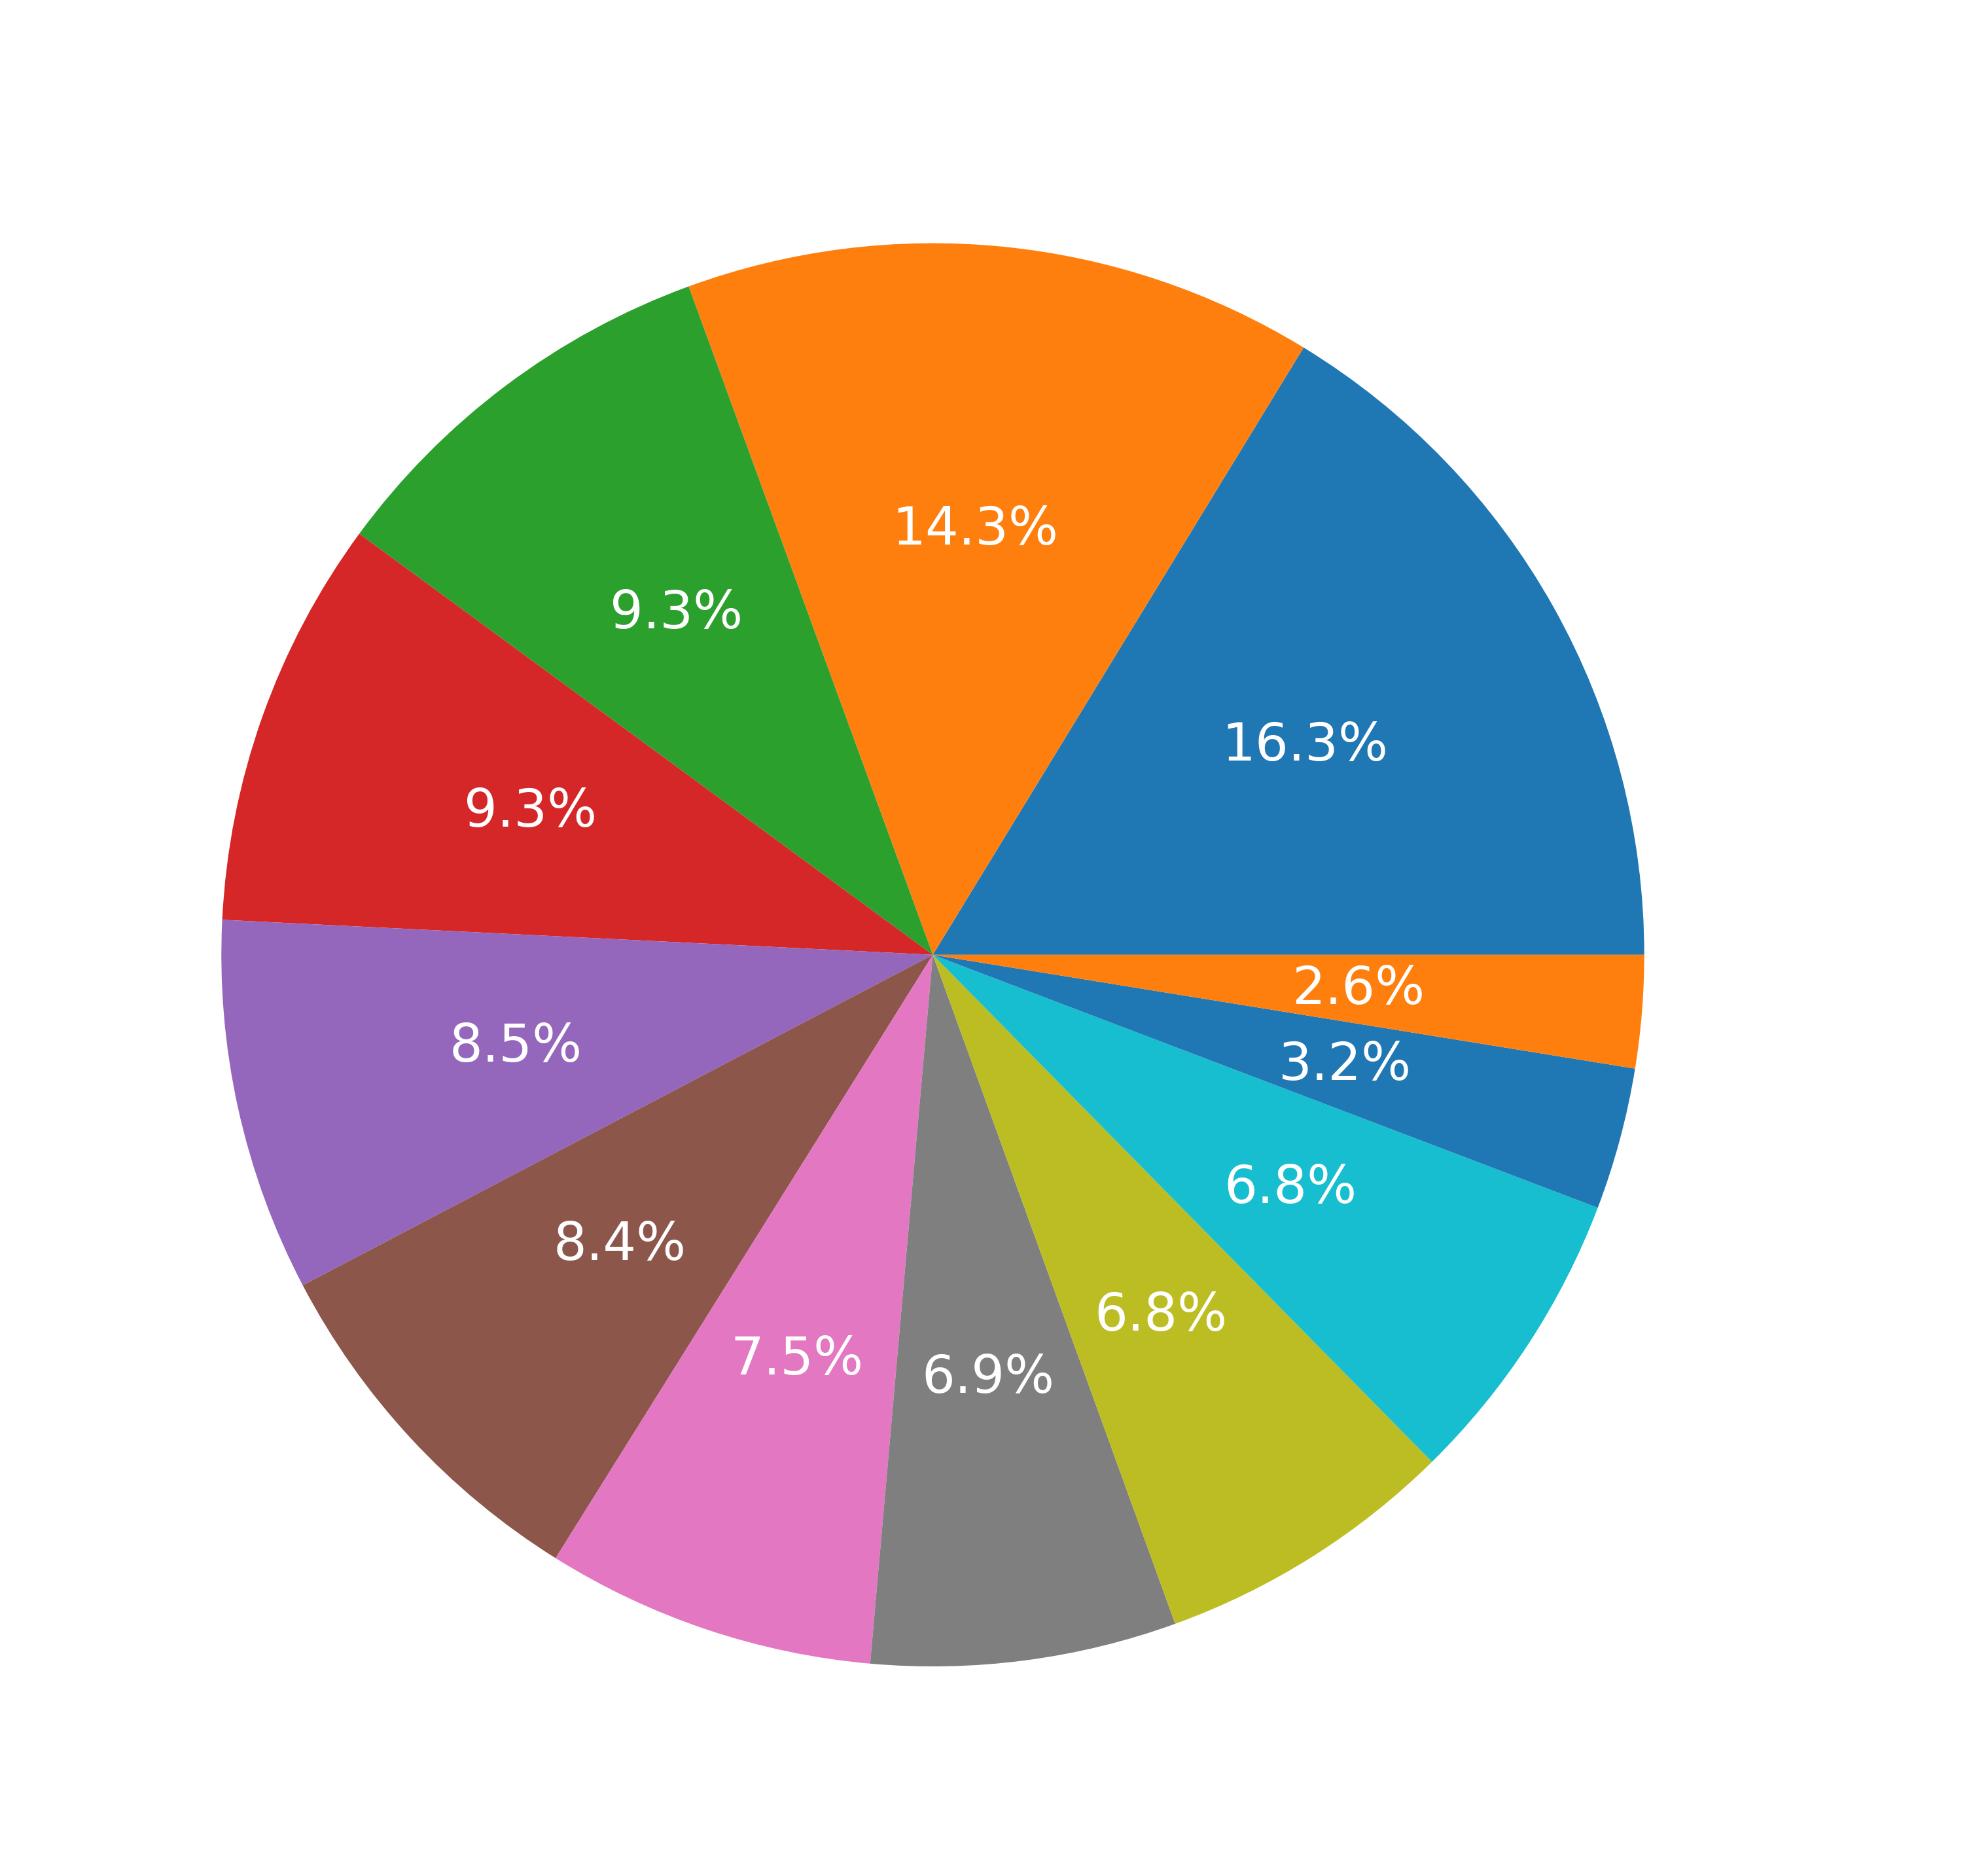

In [ ]:
fig  =plt.figure(figsize=(50,50))
plt.rc('font', size=80)  
plt.pie(NA_Sales,labels = NA_Sales.index,autopct='%.1f%%')
plt.rcParams.update({'text.color': "White",
                     'axes.labelcolor': "White"})
plt.title("North America Sales")

plt.show()

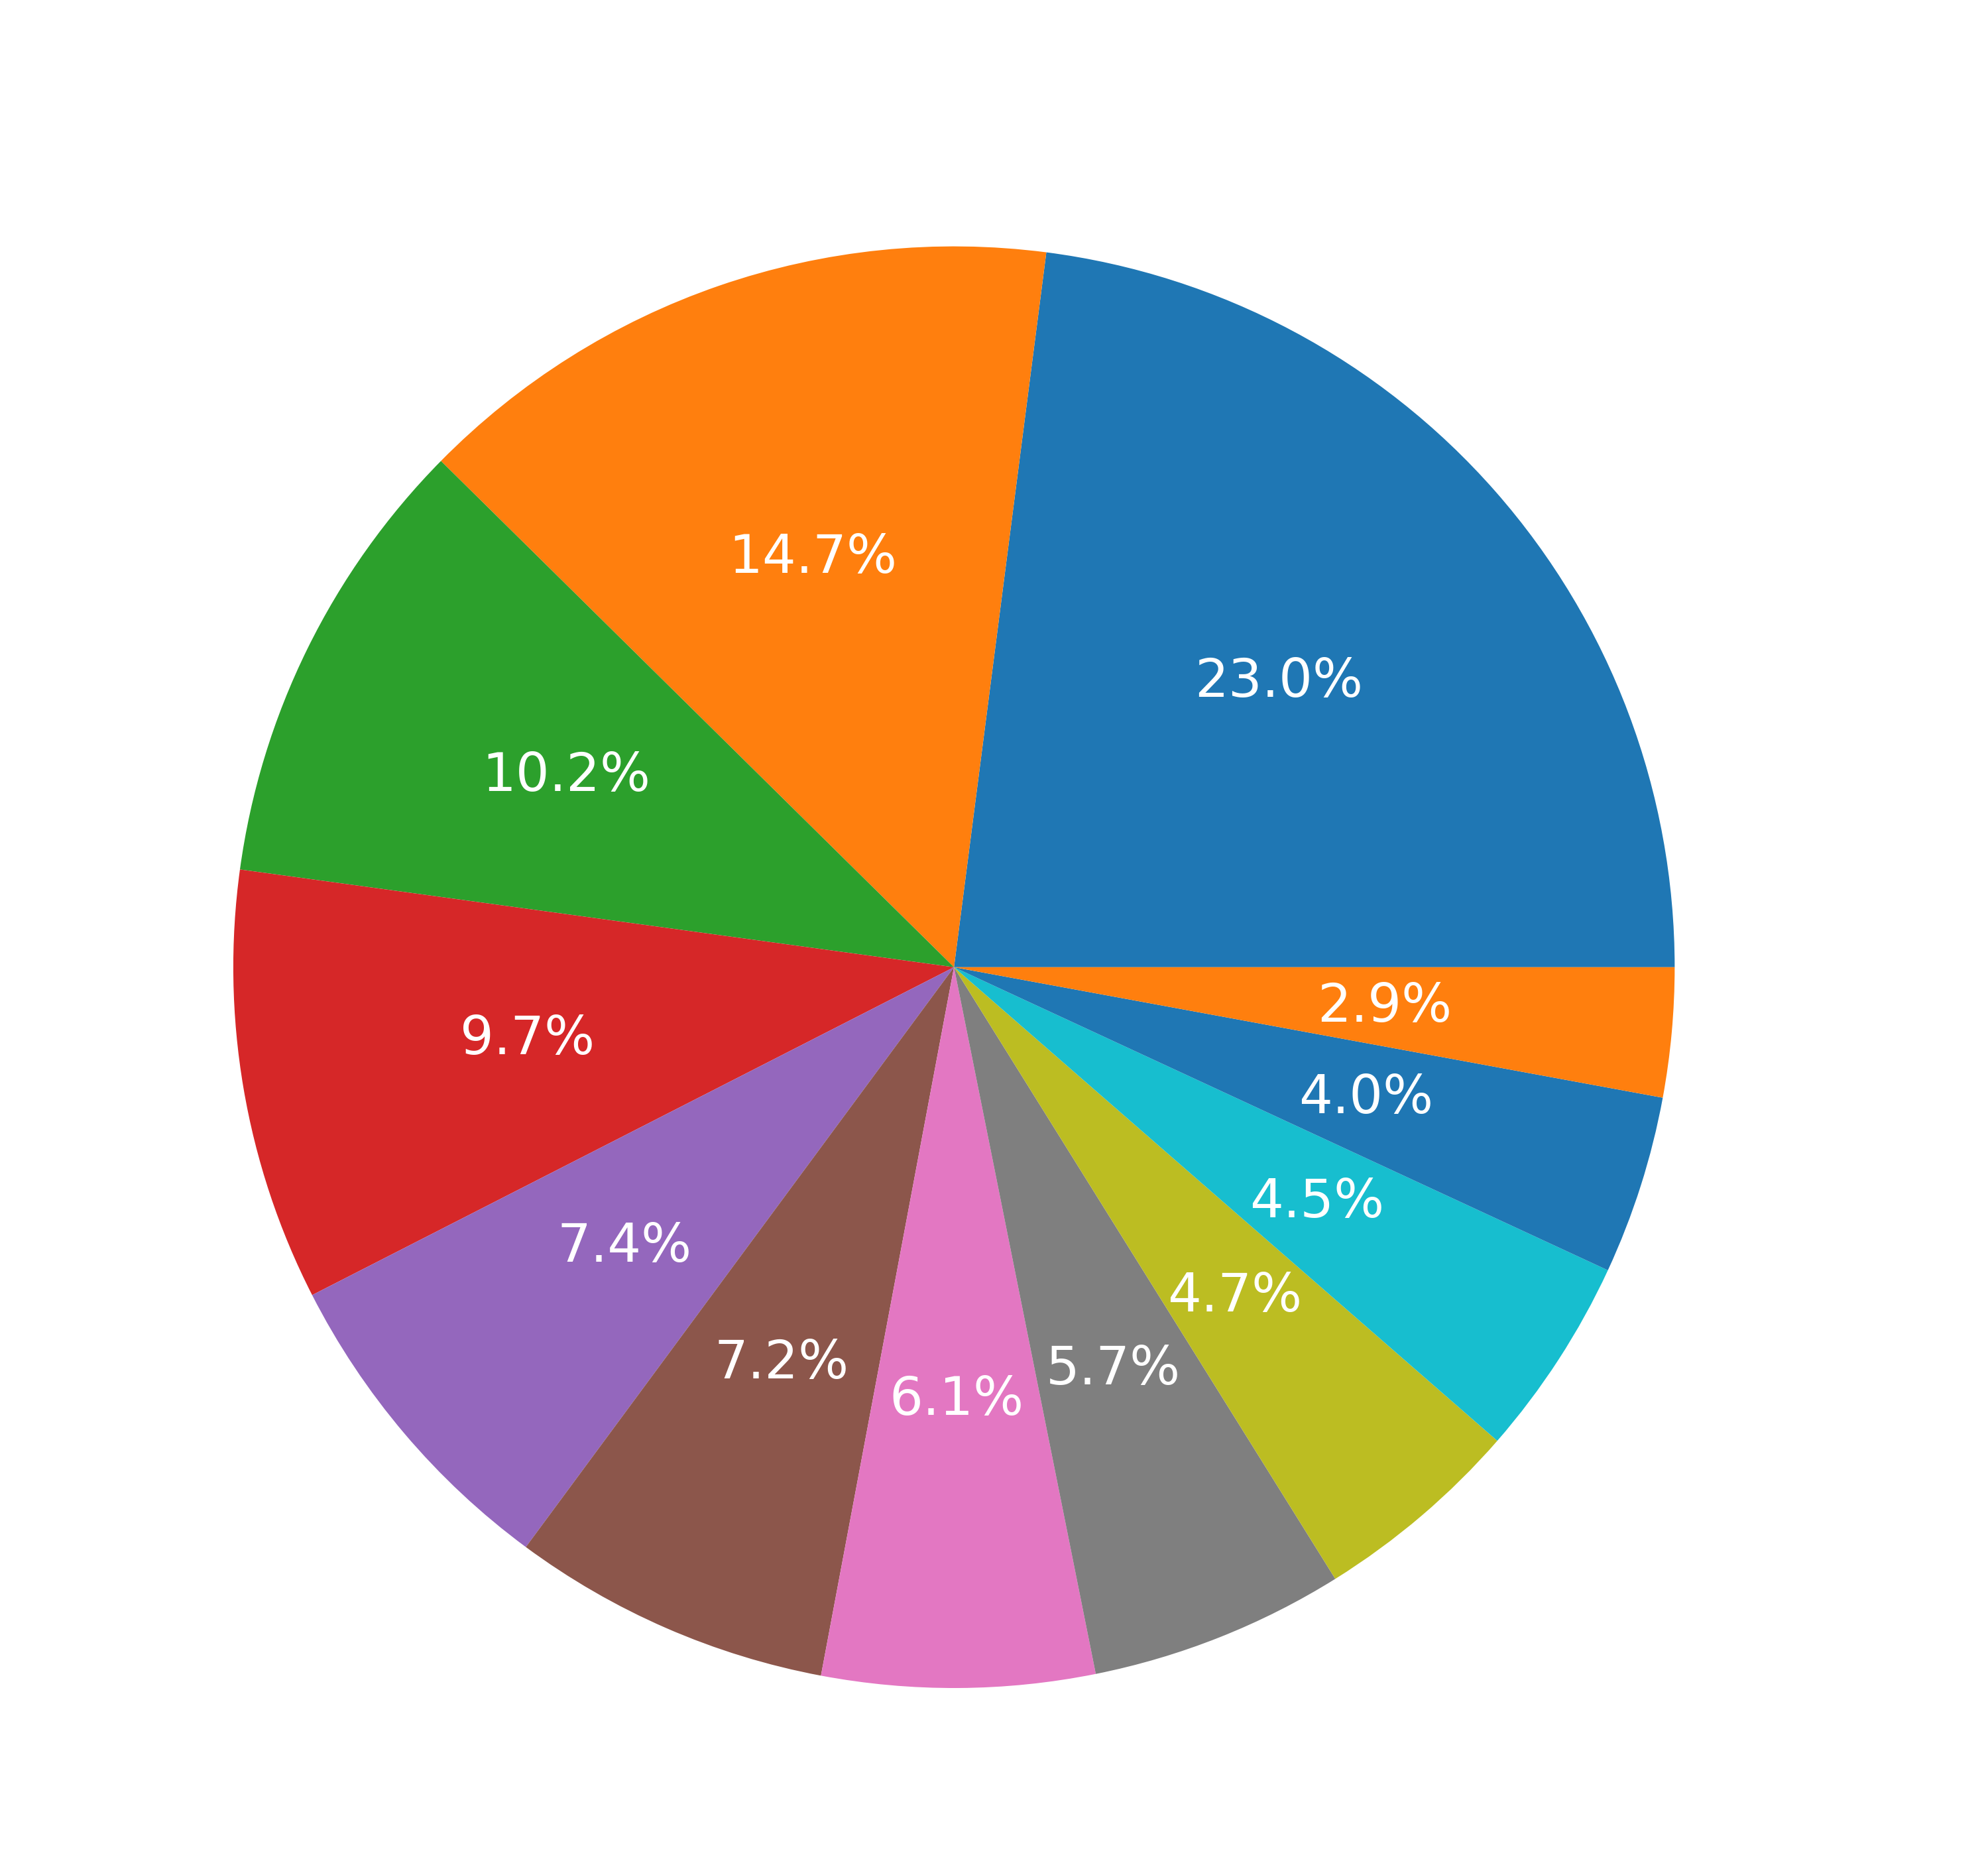

In [ ]:

fig  =plt.figure(figsize=(50,50))
plt.rc('font', size=80)  
plt.pie(JP_Sales,labels = JP_Sales.index,autopct='%.1f%%')
plt.title("JP Sales Genre")

plt.rcParams.update({'text.color': "White",
                     'axes.labelcolor': "White"})


plt.show()

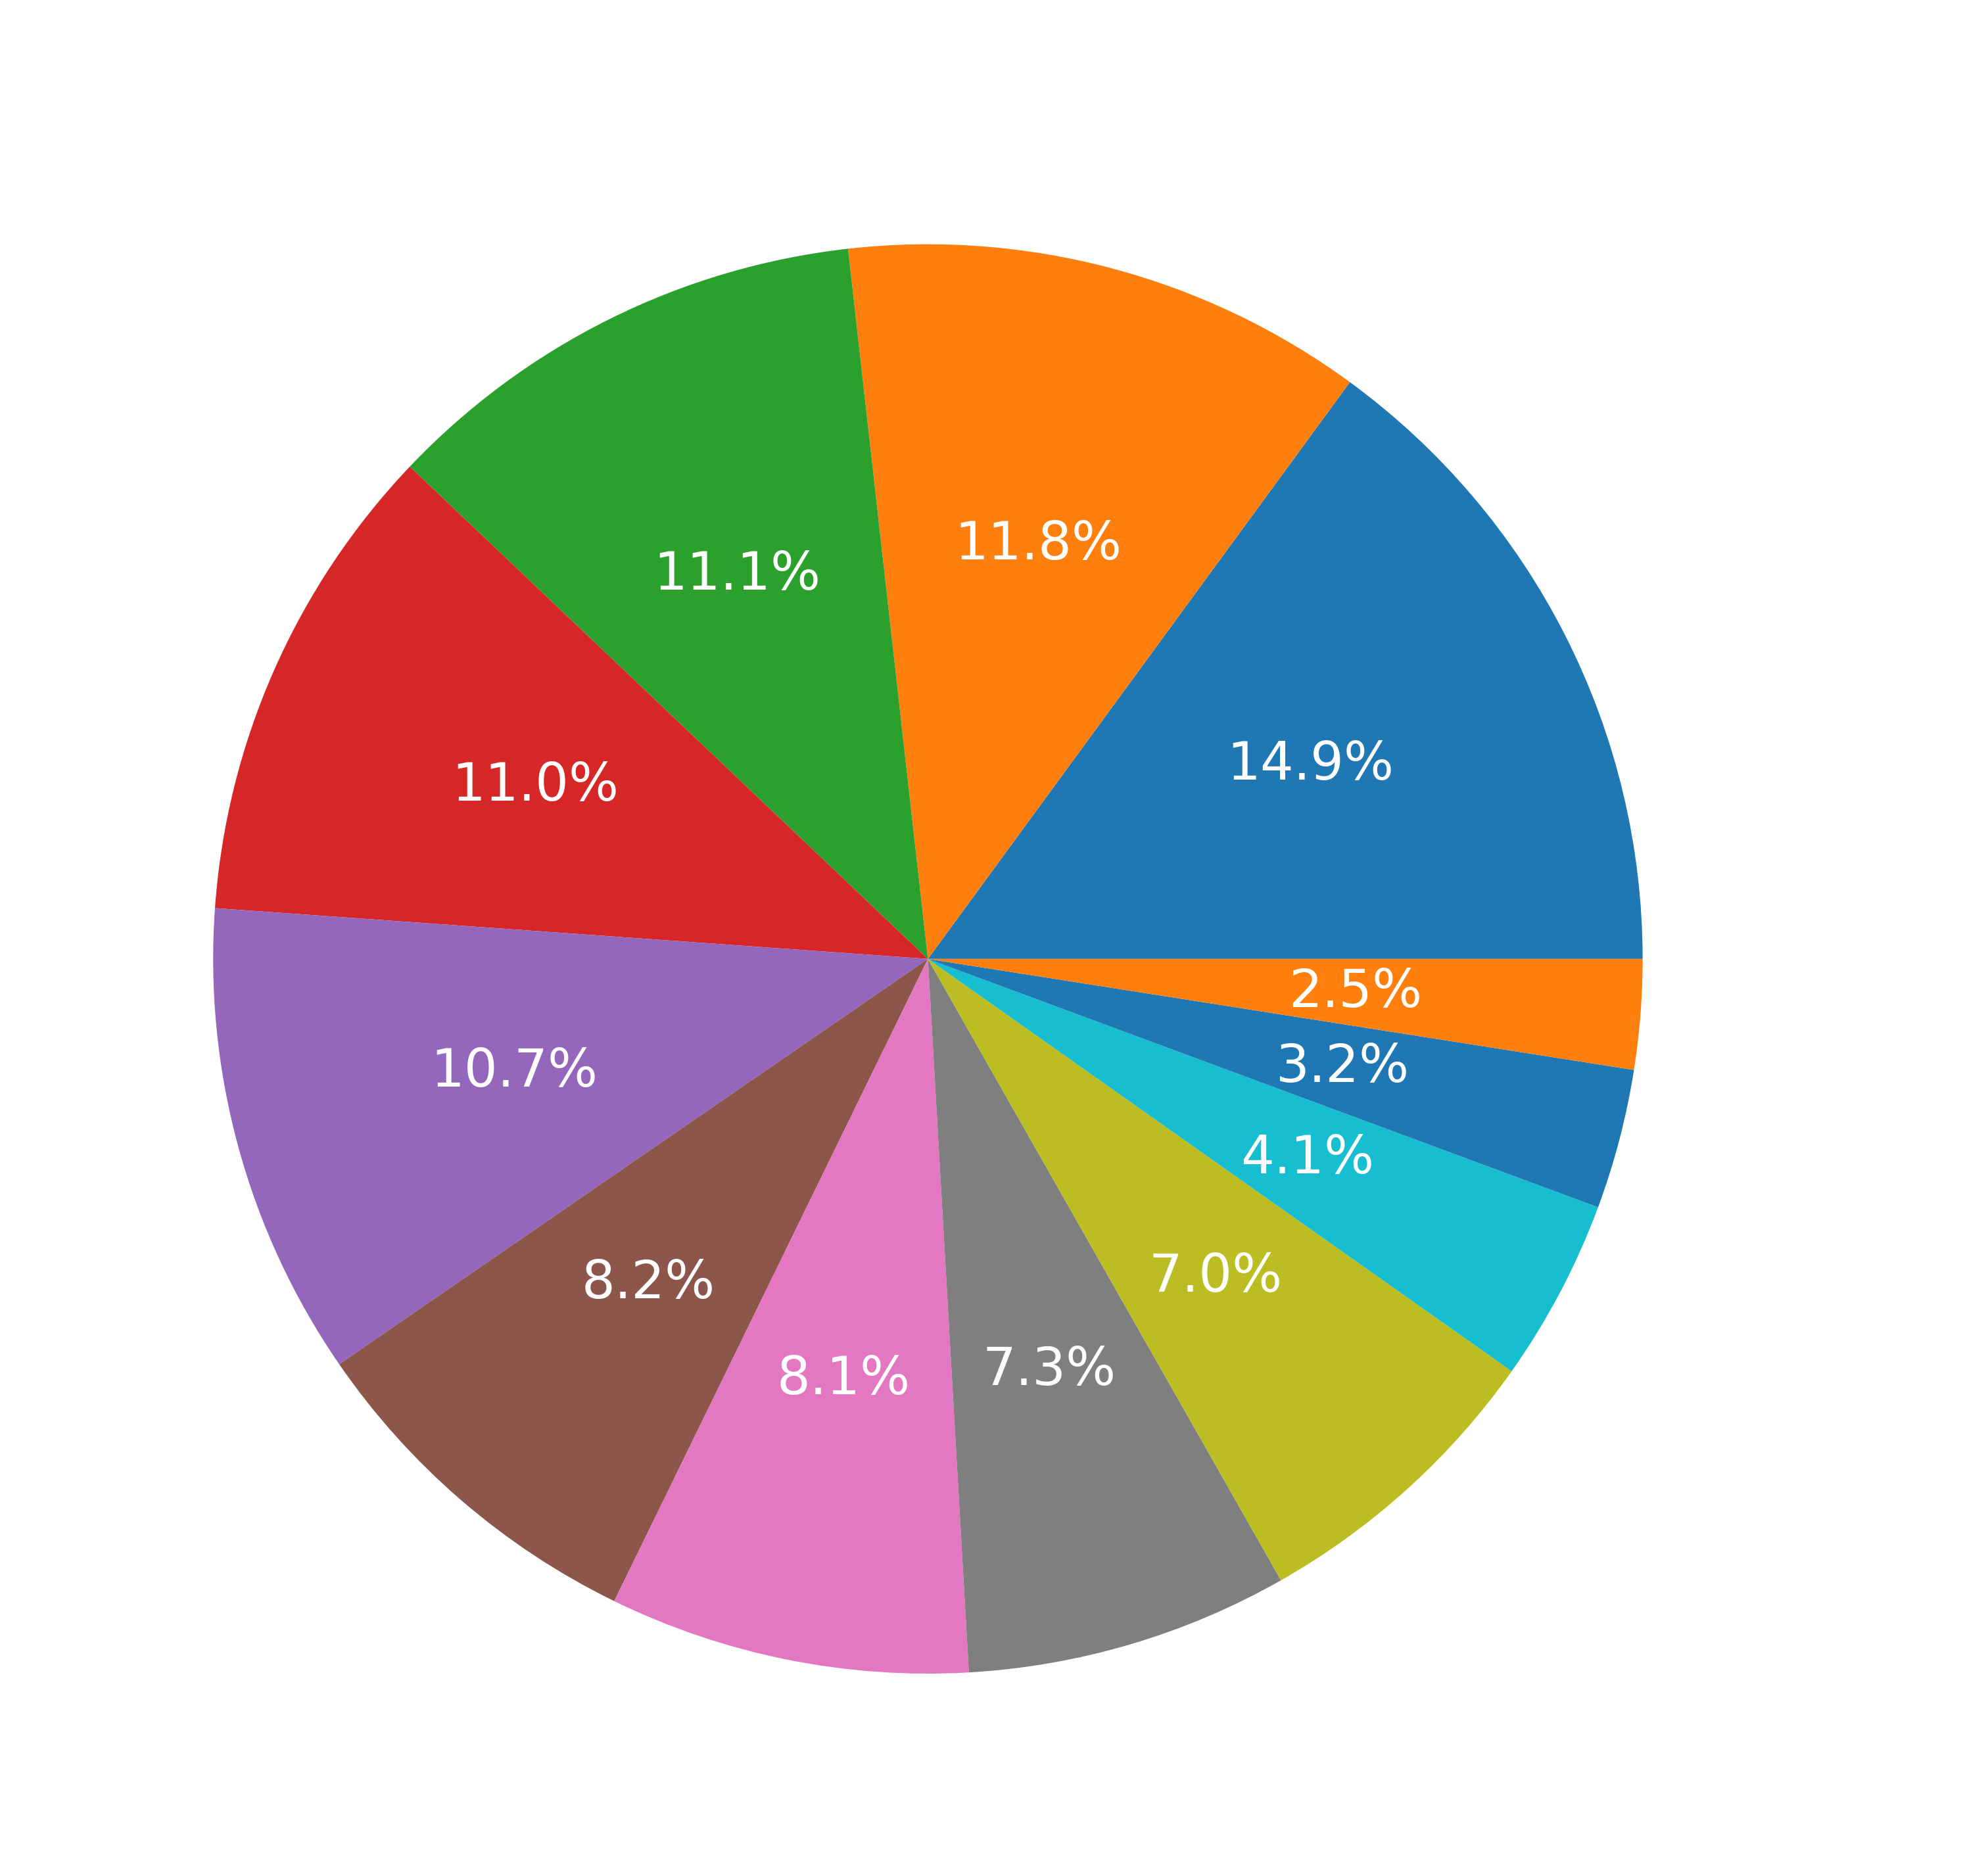

In [ ]:




fig  =plt.figure(figsize=(50,50))
plt.rc('font', size=80)  
plt.pie(Other_Sales,labels = Other_Sales.index,autopct='%.1f%%')


plt.rcParams.update({'text.color': "White",
                     'axes.labelcolor': "White"})

plt.title("Other Sales Genre")
plt.show()

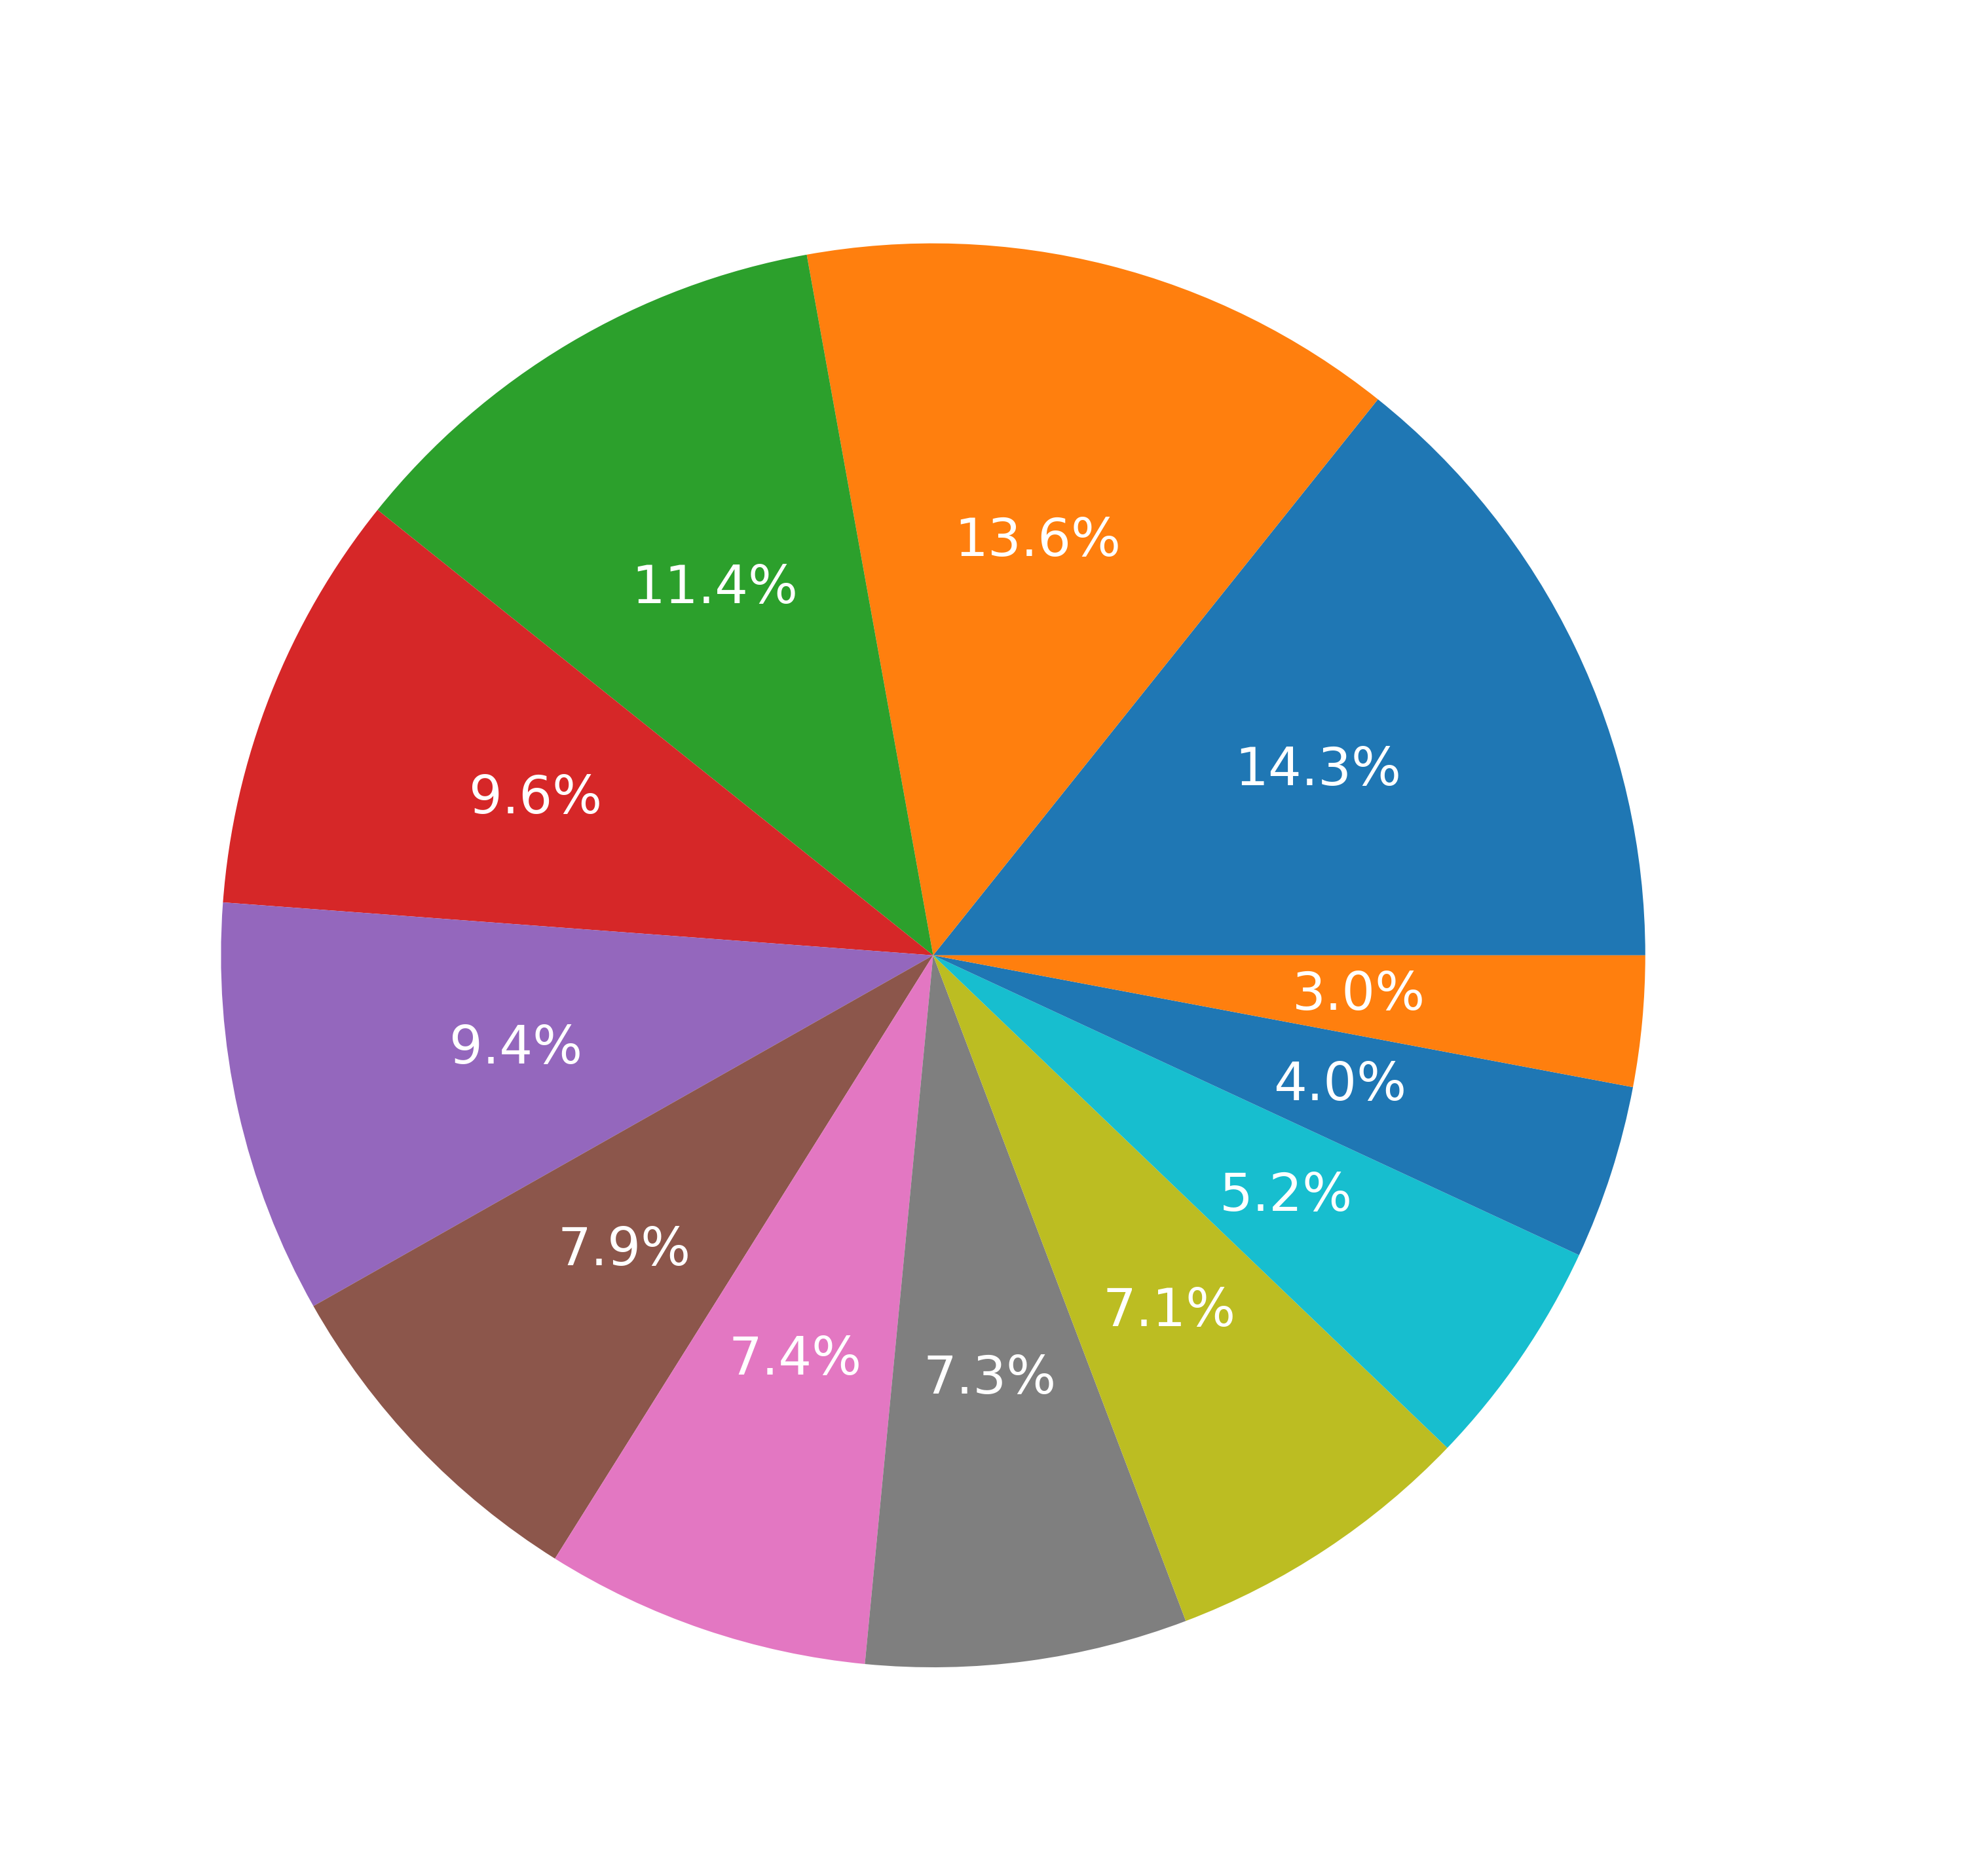

In [ ]:

fig  =plt.figure(figsize=(50,50))
plt.rc('font', size=80)  
plt.pie(EU_Sales,labels = EU_Sales.index,autopct='%.1f%%')


plt.rcParams.update({'text.color': "White",
                     'axes.labelcolor': "White"})
plt.title("EU Sales Genre")

plt.show()

In [ ]:
Total_Sales=L['Total_sales'].sort_values(ascending = False)

([<matplotlib.patches.Wedge at 0x7fd5ec27b1f0>,
 [Text(0.9821249740901606, 0.4954094622313963, 'Platform'),
  Text(0.264754203665503, 1.0676634355645254, 'Shooter'),
  Text(-0.48183756542534134, 0.9888541654586788, 'Role-Playing'),
  Text(-0.9534285417488131, 0.548610987657677, 'Racing'),
  Text(-1.0985417104365995, -0.0566225258270122, 'Sports'),
  Text(-0.9111661168771363, -0.6162599349747157, 'Fighting'),
  Text(-0.48213924852503104, -0.9887071078088386, 'Action'),
  Text(0.03908282781177483, -1.099305477367522, 'Misc'),
  Text(0.518345615069376, -0.9702153489500929, 'Simulation'),
  Text(0.8792488126119667, -0.6610003975191292, 'Puzzle'),
  Text(1.0479952155821182, -0.334224517528248, 'Strategy'),
  Text(1.095466364726087, -0.09976694720102483, 'Adventure')],
 [Text(0.5357045313219058, 0.27022334303530704, '14.9%'),
  Text(0.1444113838175471, 0.5823618739442865, '12.5%'),
  Text(-0.2628204902320043, 0.5393749993410974, '9.6%'),
  Text(-0.5200519318629889, 0.29924235690418743, '9.3%

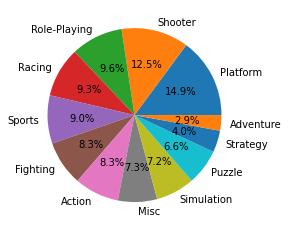

In [ ]:
plt.pie(Total_Sales,labels = Total_Sales.index,autopct='%.1f%%')

전체 년도에서 플랫폼 게임이 가장 인기가 많다는 것을 알 수 있다. 하지만 이는 "super mario"와 같이 매출이 높은 게임의 영향이 높지 않을까 추측해볼수 있다. 

퍼블리셔의 원소 추출

In [ ]:
df.describe()

Unnamed: 0          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16322.000000  16322.000000  16322.000000  16322.000000  16322.000000   
mean    8304.863681   2006.409080      0.265483      0.147322      0.077999   
std     4793.144010      5.827344      0.821438      0.507533      0.308606   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4158.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8301.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12455.750000   2010.000000      0.240000      0.110000      0.040000   
max    16598.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  
count  16322.000000  
mean       0.048254  
std        0.189361  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.040000  
max       10.570000

년도에 0이 있다는 것을 확인

In [ ]:
a = df.loc[df["Year"]<=1970]

year에 부정확한 값이 있다는 것을 확인했다. 데이터를 확인해보니 0값은 2000년도이다.

즉 만약 값이 1970보다 작은 값이면 값에 2000을 더해야 한다.

In [ ]:
a.describe()

Unnamed: 0  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
count         0.0   0.0       0.0       0.0       0.0          0.0
mean          NaN   NaN       NaN       NaN       NaN          NaN
std           NaN   NaN       NaN       NaN       NaN          NaN
min           NaN   NaN       NaN       NaN       NaN          NaN
25%           NaN   NaN       NaN       NaN       NaN          NaN
50%           NaN   NaN       NaN       NaN       NaN          NaN
75%           NaN   NaN       NaN       NaN       NaN          NaN
max           NaN   NaN       NaN       NaN       NaN          NaN

In [ ]:
def convert_years(y):
    if y<=1970:
      if y <=20:
        return int(y+2000)
      elif y> 20:
        return int(y+1900)
    else:
      return int(y)
        


In [ ]:
df['Year'] = df['Year'].apply(convert_years)

In [ ]:
df.describe()

Unnamed: 0          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16322.000000  16322.000000  16322.000000  16322.000000  16322.000000   
mean    8304.863681   2006.409080      0.265483      0.147322      0.077999   
std     4793.144010      5.827344      0.821438      0.507533      0.308606   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4158.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8301.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12455.750000   2010.000000      0.240000      0.110000      0.040000   
max    16598.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  
count  16322.000000  
mean       0.048254  
std        0.189361  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.040000  
max       10.570000

In [ ]:
def convert_years_10years(y):
    if y <1990:
      return 1980
    elif y< 2000:
      return 1990

    elif y < 2010:
      return 2000
    elif y < 2020:
      return 2010
    else:
      return 2020

        

In [ ]:
df['years_10years'] = df['Year'].apply(convert_years_10years)

In [ ]:
df.describe()

Unnamed: 0          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16322.000000  16322.000000  16322.000000  16322.000000  16322.000000   
mean    8304.863681   2006.409080      0.265483      0.147322      0.077999   
std     4793.144010      5.827344      0.821438      0.507533      0.308606   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4158.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8301.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12455.750000   2010.000000      0.240000      0.110000      0.040000   
max    16598.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  years_10years  
count  16322.000000   16322.000000  
mean       0.048254    2001.823306  
std        0.189361       6.638856  
min        0.000000    1980.000000  
25%        0.000000    2000.000000  
50%        0.010000    2000.000000  
75%        0.040000    2010.000000  
max       10.570000    2020.000000

In [ ]:
df

Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   
16597       16598                        The King of Fighters '95       PS   

       Year      Genre                    Publisher  NA_Sales  EU_Sales  \
0      2008     Action                    Destineer      0.04      0.00   
1      2009     Action           Namco Bandai Games      0.17      0.00   
2      2010  Adventure                    Alchemist      0.00      0.00   
3      2010       Misc                    Zoo Games      0.04      0.00   
4      2010   Platform                  D3Publisher      0.12      0.09   
...     ...        ...                          ...       ...       ...   
16593  2006   Platform                Vivendi Games      0.15      0.04   
16594  2005     Action            Rising Star Games      0.01      0.00   
16595  2015     Sports         Take-Two Interactive      0.44      0.19   
16596  2013     Action                   Tecmo Koei      0.05      0.05   
16597  1996   Fighting  Sony Computer Entertainment      0.00      0.00   

       JP_Sales  Other_Sales       Total_Sales  years_10years  
0          0.00         0.00           0.04000           2000  
1          0.00         0.01        0.17000.01           2000  
2          0.02         0.00           000.020           2010  
3          0.00         0.00           0.04000           2010  
4          0.00         0.04     0.120.0900.04           2010  
...         ...          ...               ...            ...  
16593      0.00         0.01     0.150.0400.01           2000  
16594      0.00         0.00           0.01000           2000  
16595      0.03         0.13  0.440.190.030.13           2010  
16596      0.25         0.03  0.050.050.250.03           2010  
16597      0.16         0.01        000.160.01           1990  

[16322 rows x 12 columns]

In [ ]:
K = df.groupby('years_10years')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()

<ipython-input-70-9f178484f6c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  K = df.groupby('years_10years')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()


In [ ]:
K

NA_Sales  EU_Sales  JP_Sales  Other_Sales
years_10years                                           
1980           1.149561  0.152195  0.499951     0.034780
1990           0.325794  0.159813  0.210516     0.026774
2000           0.262409  0.136789  0.055138     0.050481
2010           0.215109  0.161707  0.056676     0.052174
2020           0.270000  0.000000  0.000000     0.020000

1980년도와 1990년도 사이에 아타리 쇼크가 발생했음을 확인할 수 있다.

In [ ]:
K['Total_sales'] =  K.sum(axis=1)

In [ ]:
K

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_sales
years_10years                                                        
1980           1.149561  0.152195  0.499951     0.034780     1.836488
1990           0.325794  0.159813  0.210516     0.026774     0.722897
2000           0.262409  0.136789  0.055138     0.050481     0.504817
2010           0.215109  0.161707  0.056676     0.052174     0.485666
2020           0.270000  0.000000  0.000000     0.020000     0.290000

각 지역별로 Top 장르의 개수 4개만 추출

In [ ]:
df['Year'].value_counts()

2008    1433
2009    1431
2010    1265
2007    1200
2011    1141
2006    1010
2005     939
2002     836
2003     780
2004     744
2012     656
2015     612
2014     581
2013     548
2001     482
1998     377
2000     349
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

트렌드를 매출로 예측하는 것과 출시 개수로 예측

또한 연도로 구분하라는 것은 시계열 데이터로 예측하라는 것이다.

장르를 이름으로 갖는 데이터를 생성, > 각 장르의 매출에 대한 시계열 데이터 생성

In [ ]:
A = list(set(list(df["Genre"])))

In [ ]:
A

['Adventure',
 'Platform',
 'Racing',
 'Puzzle',
 'Role-Playing',
 'Fighting',
 'Action',
 'Simulation',
 'Strategy',
 'Shooter',
 'Misc',
 'Sports']

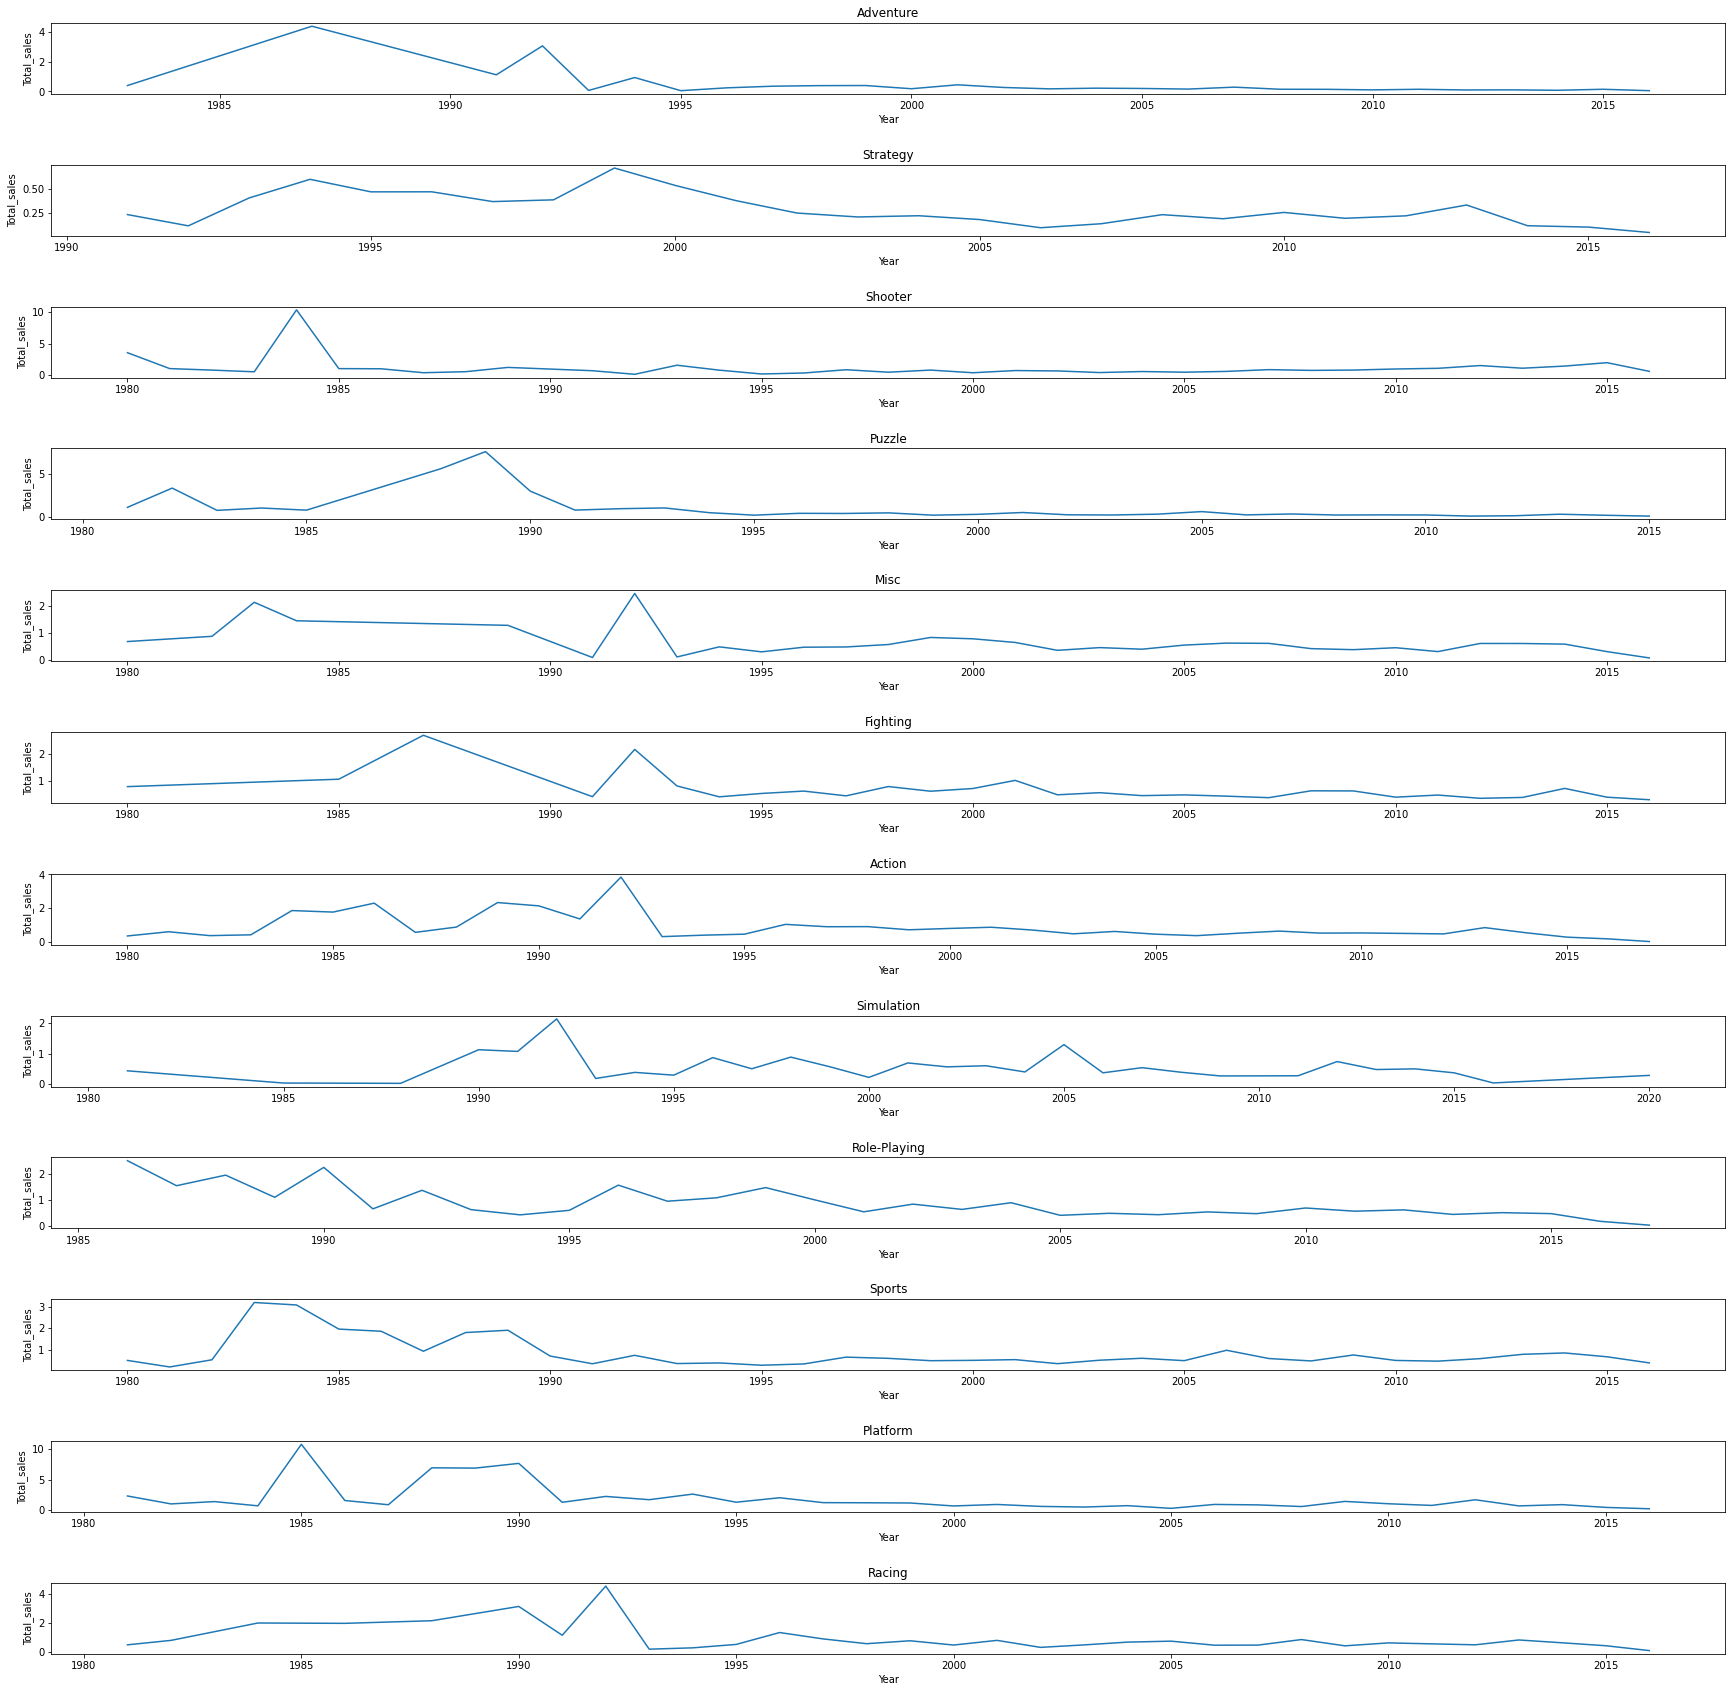

In [ ]:
A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}
plt.figure(figsize=(30, 30))
 
sharey = 'all'
sharex =  'all'
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    
    
    k = A.index(item)
    plt.subplot(12, 1, k+1)
    plt.subplots_adjust(wspace=1, hspace=1)
    my_dict[item]=my_dict[item].groupby("Year")["Total_sales"].mean().plot()

    plt.xlabel("Year")
    plt.ylabel("Total_sales")

    plt.title(item)

    

그후 x축과 y축 공유를 하여 데이터를 비교해 볼 것이다.

또한 mean()그래프를 그려 

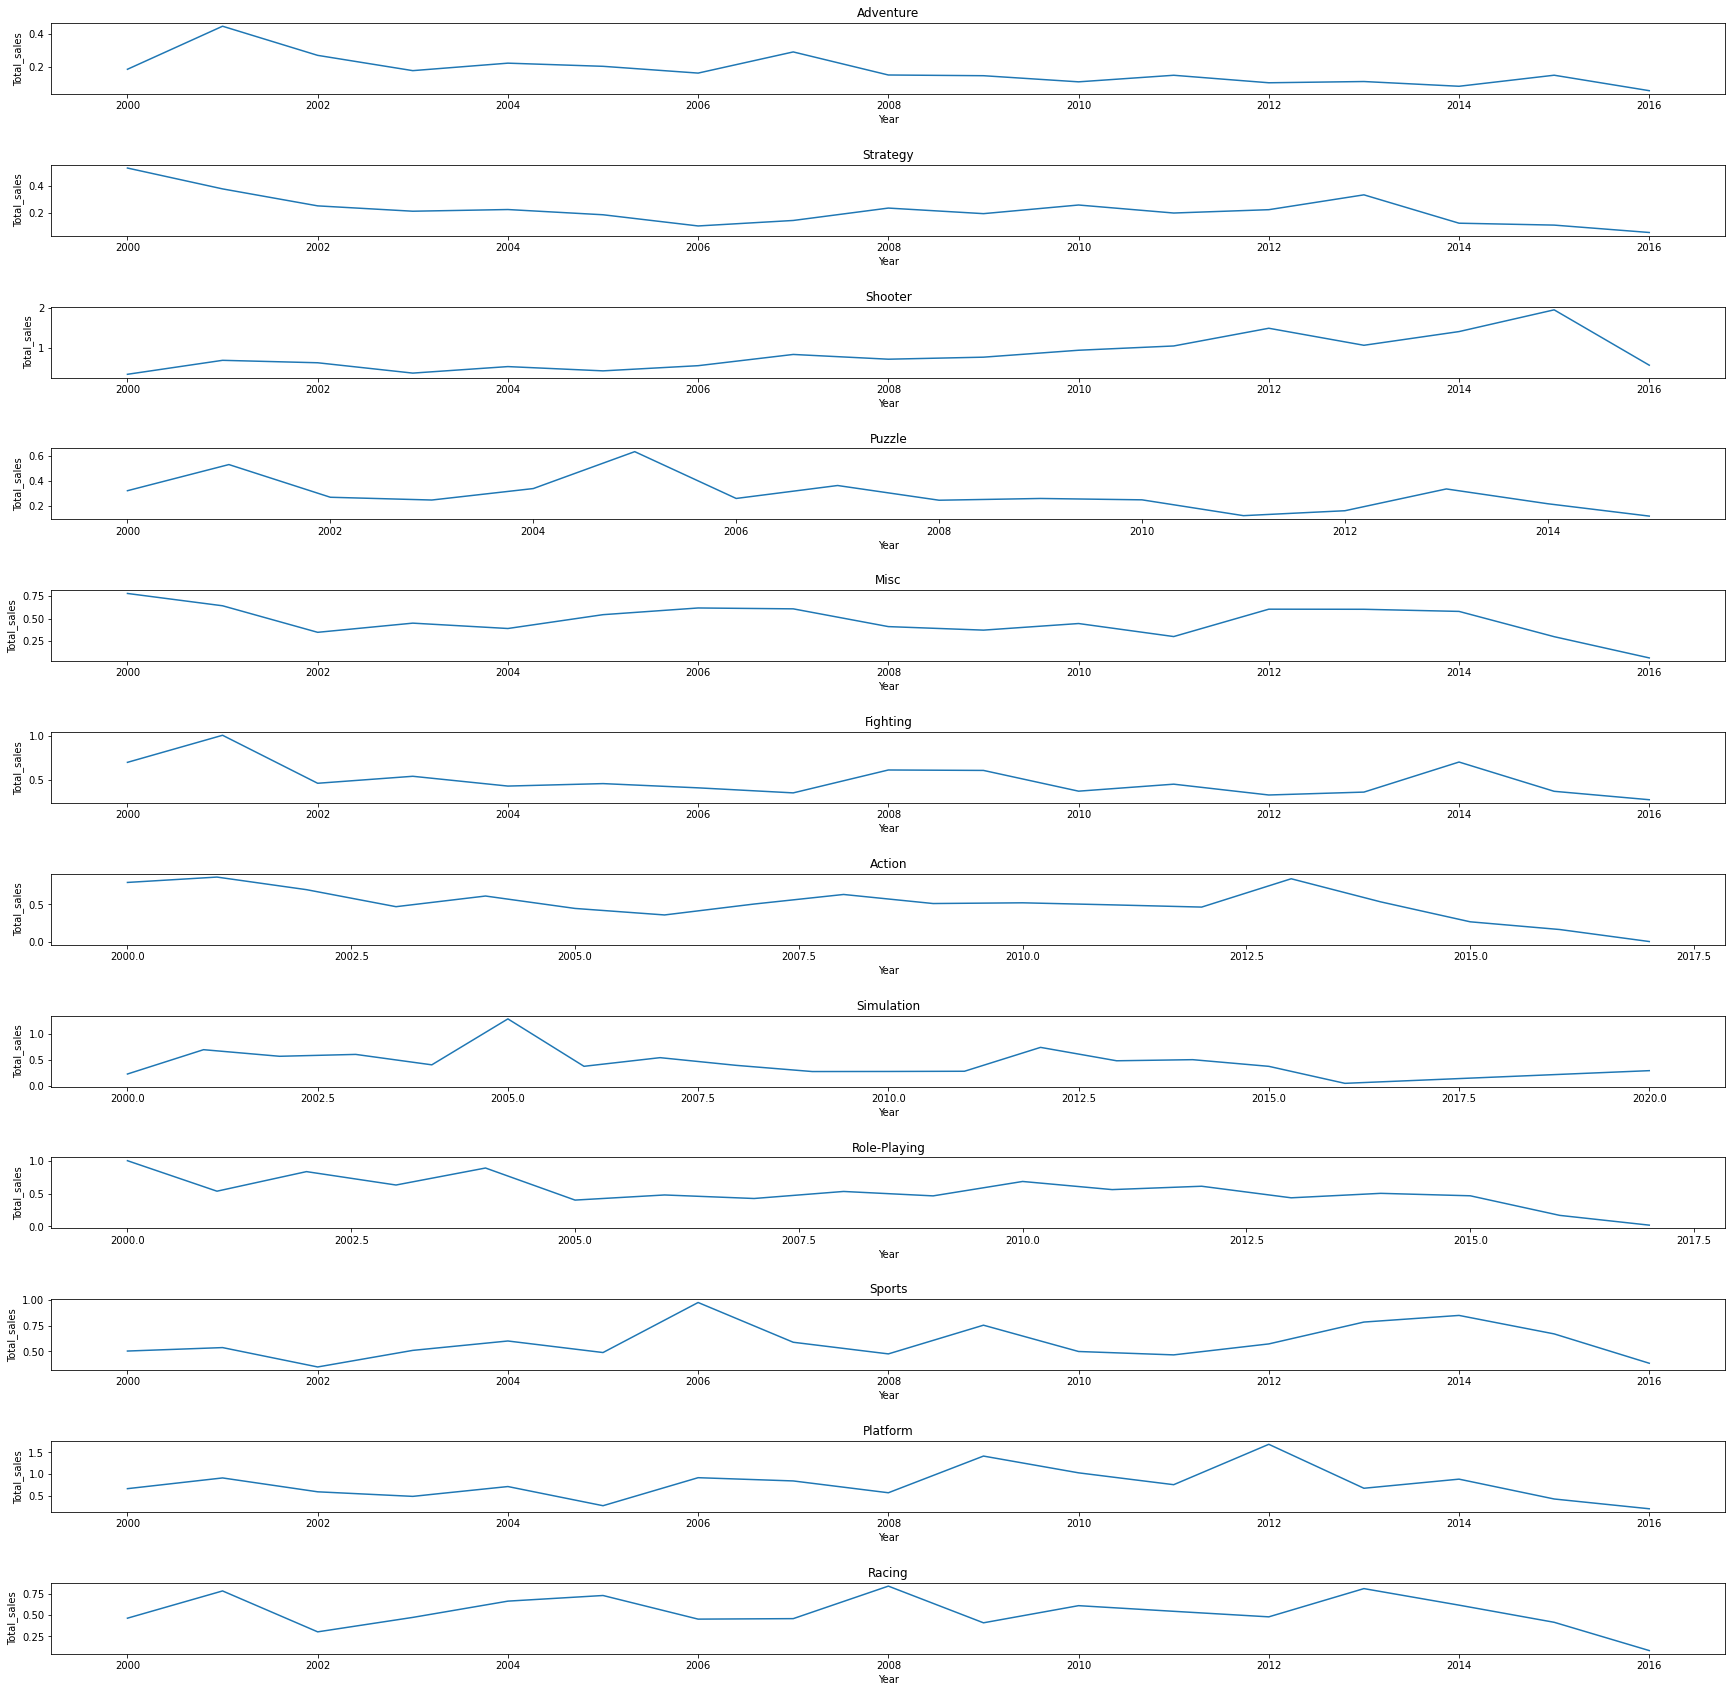

In [ ]:
##Total_sales_mean

A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}
plt.figure(figsize=(30, 30))

sharey = 'all'
sharex =  'all'
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    my_dict[item].drop(my_dict[item][my_dict[item]["Year"] <2000].index,inplace = True)
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']

    
    
    k = A.index(item)
    plt.subplot(12, 1, k+1)
    plt.subplots_adjust(wspace=1, hspace=1)

    my_dict[item]=my_dict[item].groupby("Year")["Total_sales"].mean().plot()

    plt.xlabel("Year")
    plt.ylabel("Total_sales")

    plt.title(item)

    

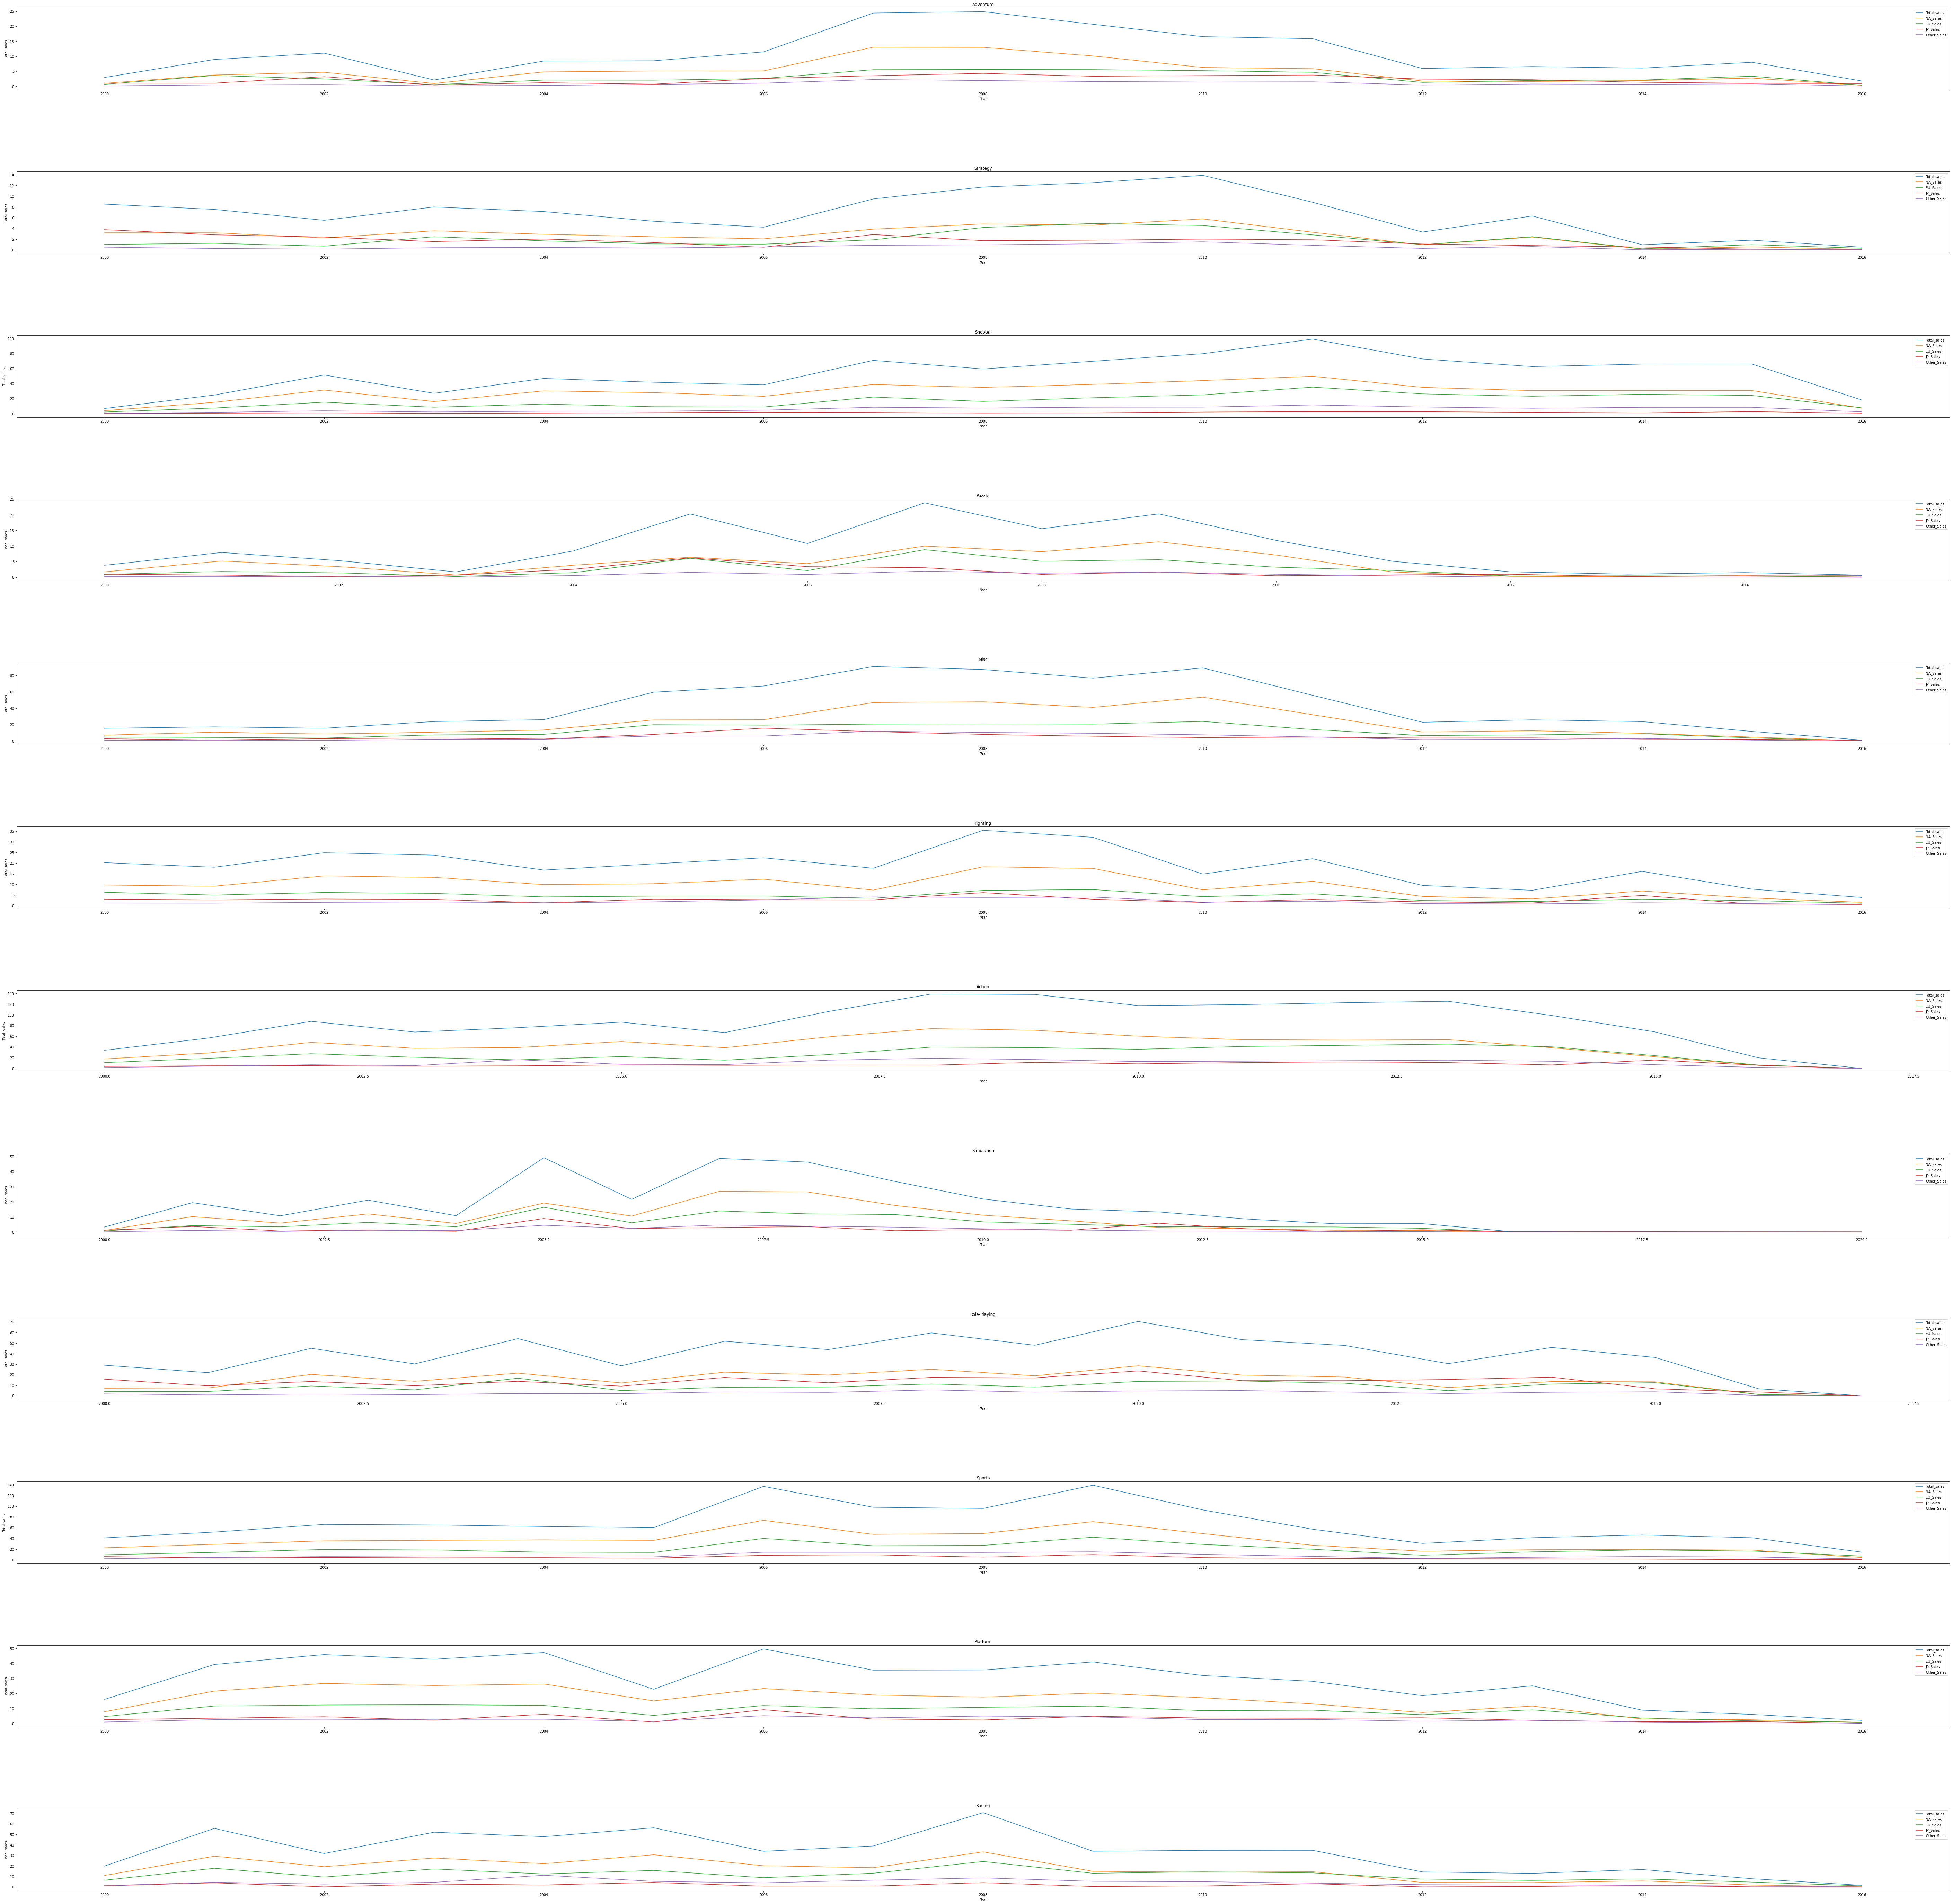

In [ ]:
##Total_sales_sum
A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(100, 100))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    my_dict[item].drop(my_dict[item][my_dict[item]["Year"] <2000].index,inplace = True)
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    a = my_dict[item]['Total_sales'].mean()

    
    
    k = A.index(item)
    plt.subplot(12, 1, k+1)
    plt.subplots_adjust(wspace=1, hspace=1)


    my_dict[item].groupby("Year")["Total_sales"].sum().plot()
    my_dict[item].groupby("Year")["NA_Sales"].sum().plot()
    my_dict[item].groupby("Year")["EU_Sales"].sum().plot()
    my_dict[item].groupby("Year")["JP_Sales"].sum().plot()
    my_dict[item].groupby("Year")["Other_Sales"].sum().plot()


    plt.xlabel("Year")
    plt.ylabel("Total_sales")
    plt.legend()

    plt.title(item)


시장 점유율이 2020년에 가장 높아질 것을 찾아보자.

In [ ]:
##Total_sales_mean

A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    my_dict[item].drop(my_dict[item][my_dict[item]["Year"] <2000].index,inplace = True)
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    
    
    
    #2000년도부터 생성> 2010년
B = df.groupby("Year")["Total_Sales"].sum()
B[2000:2020]

Series([], Name: Total_Sales, dtype: float64)

In [ ]:
B = df.groupby("Year")["Total_Sales"].sum()
B

Year
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.14
1993     45.99
1994     79.22
1995     88.11
1996    198.73
1997    201.07
1998    255.17
1999    249.16
2000    201.56
2001    330.11
2002    402.13
2003    366.24
2004    412.85
2005    458.94
2006    516.06
2007    609.30
2008    682.38
2009    666.77
2010    596.53
2011    515.51
2012    364.19
2013    354.14
2014    337.09
2015    261.85
2016     70.84
2017      0.05
2020      0.29
Name: Total_Sales, dtype: float64

In [ ]:
B = df.groupby("Year")["Total_Sales"].sum()

B = B[20:36]

In [ ]:
B

Year
2000    201.56
2001    330.11
2002    402.13
2003    366.24
2004    412.85
2005    458.94
2006    516.06
2007    609.30
2008    682.38
2009    666.77
2010    596.53
2011    515.51
2012    364.19
2013    354.14
2014    337.09
2015    261.85
Name: Total_Sales, dtype: float64

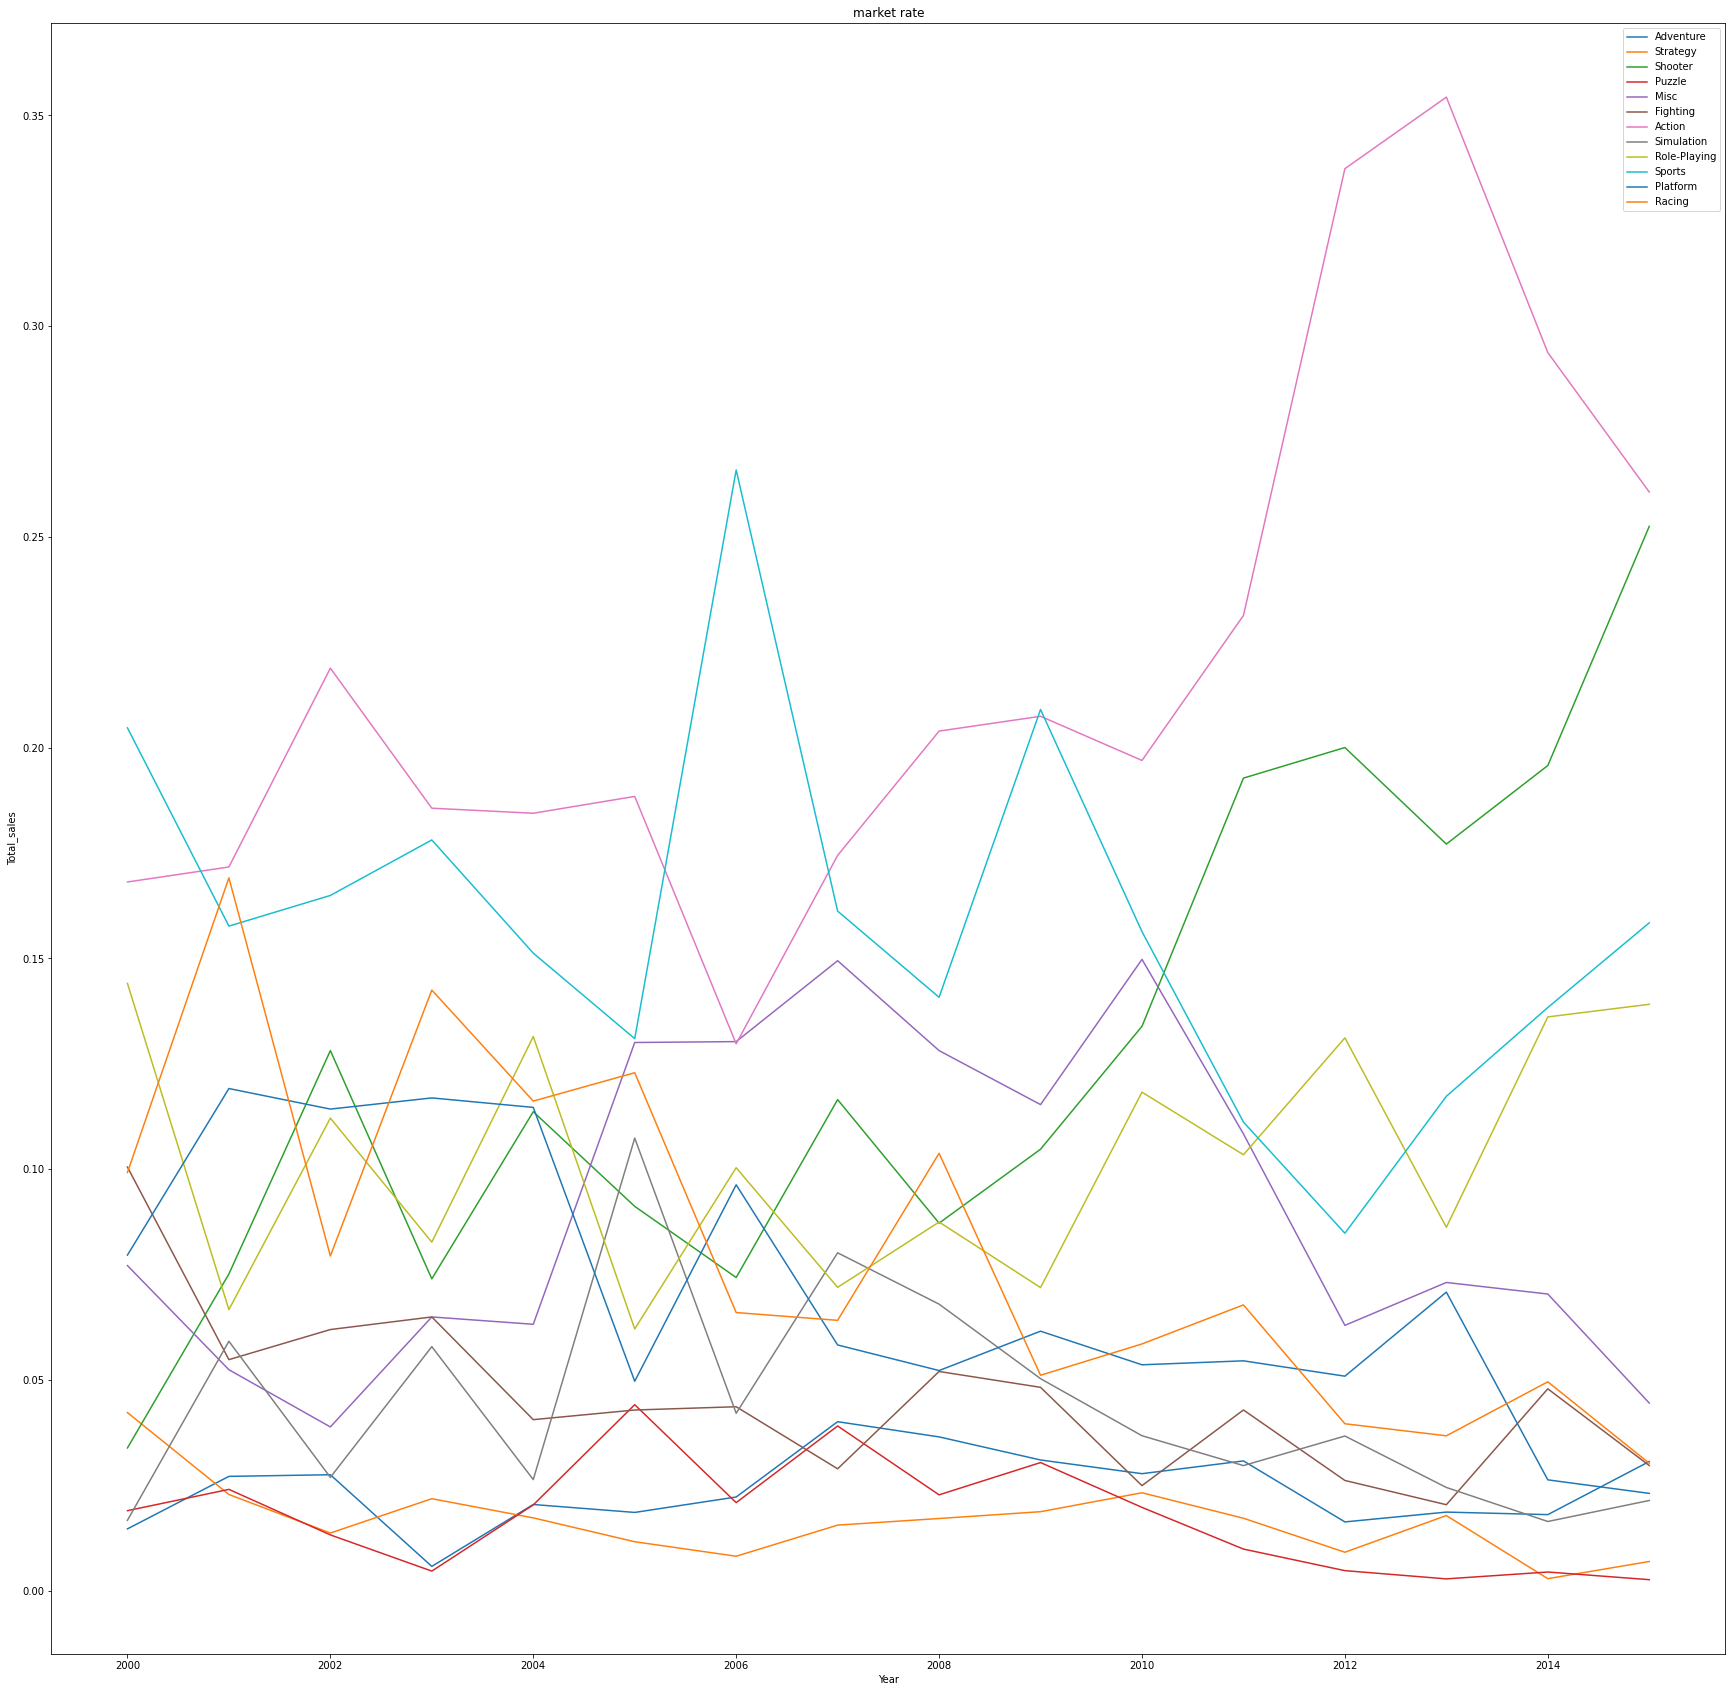

In [ ]:
##Total_sales_mean

A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(30, 30))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    my_dict[item]=my_dict[item].groupby("Year")["Total_sales"].sum()/B

    my_dict[item].plot(label = item)
    plt.xlabel("Year")
    plt.ylabel("Total_sales")

    plt.title("market rate")
    plt.legend()



In [ ]:
my_dict['Adventure']

Year
1983         NaN
1987         NaN
1991         NaN
1992         NaN
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000    0.014685
2001    0.027142
2002    0.027528
2003    0.005789
2004    0.020467
2005    0.018586
2006    0.022245
2007    0.040112
2008    0.036505
2009    0.031030
2010    0.027777
2011    0.030804
2012    0.016338
2013    0.018665
2014    0.018066
2015    0.030666
2016         NaN
dtype: float64

<ipython-input-122-f18783492090>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']


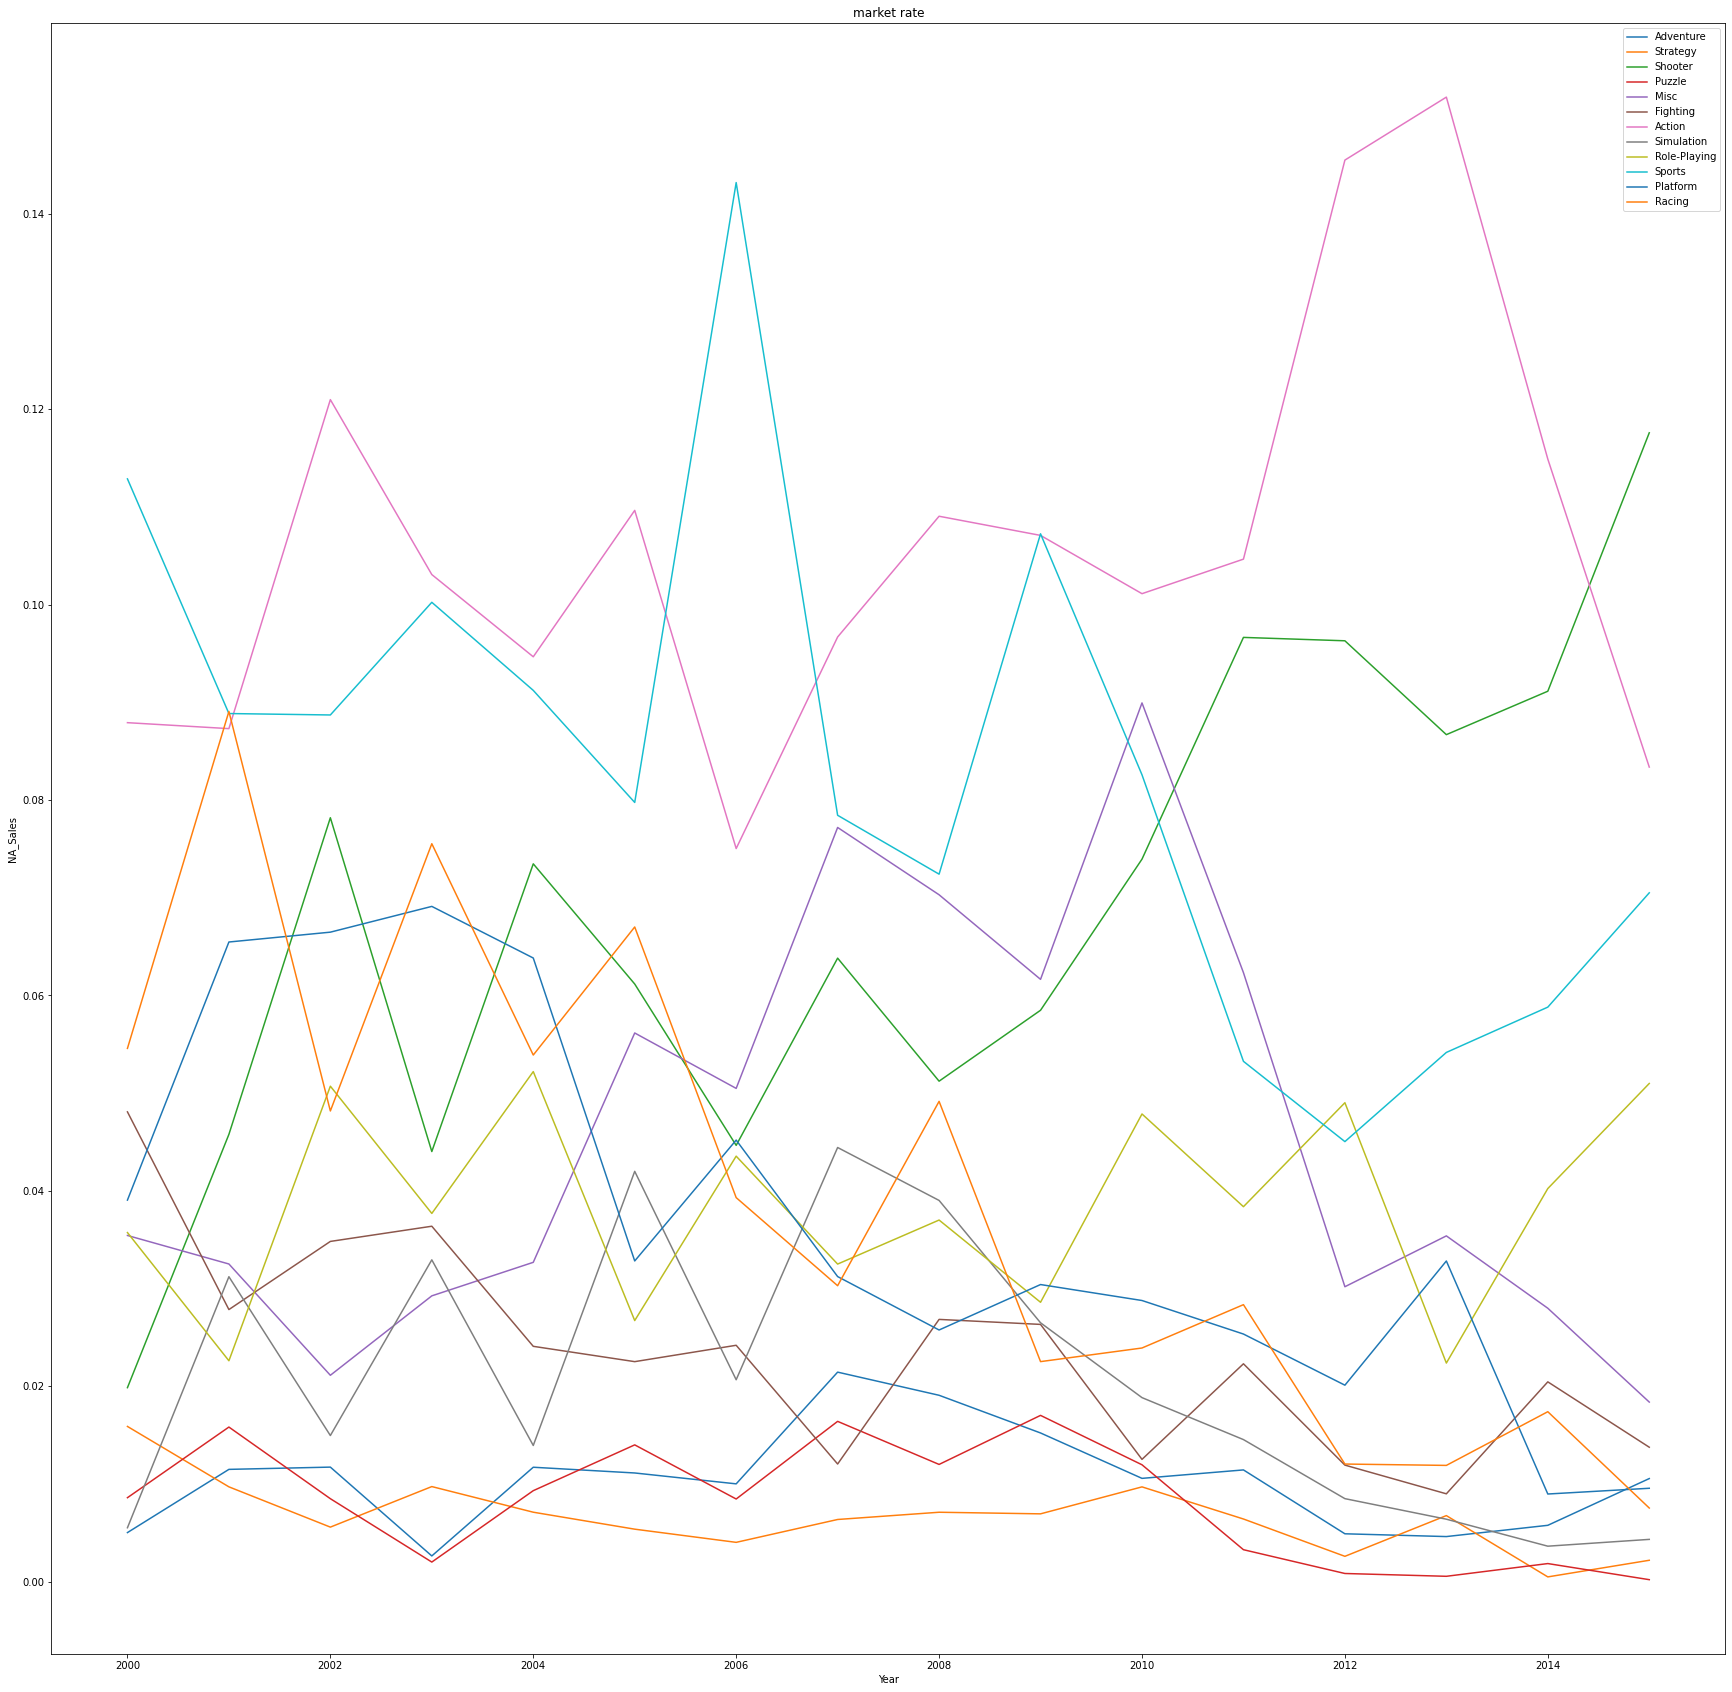

In [ ]:
##Total_sales_mean

A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(30, 30))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    my_dict[item]=my_dict[item].groupby("Year")["NA_Sales"].sum()/B

    my_dict[item].plot(label = item)
    plt.xlabel("Year")
    plt.ylabel("NA_Sales")

    plt.title("market rate")
    plt.legend()

In [ ]:
A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(30, 30))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    my_dict[item]=my_dict[item].groupby("Year")["EU_Sales"].sum()/B

    my_dict[item].plot(label = item)
    plt.xlabel("Year")
    plt.ylabel("EU_Sales")

    plt.title("market rate")
    plt.legend()

In [ ]:
A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(30, 30))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    my_dict[item]=my_dict[item].groupby("Year")["JP_Sales"].sum()/B

    my_dict[item].plot(label = item)
    plt.xlabel("Year")
    plt.ylabel("JP_Sales")

    plt.title("market rate")
    plt.legend()

In [ ]:
A = ['Adventure', 'Strategy', 'Shooter', 'Puzzle', 'Misc', 'Fighting', 'Action', 'Simulation', 'Role-Playing', 'Sports', 'Platform', 'Racing']
my_dict = {}

plt.figure(figsize=(30, 30))
for item in A:
    
    my_dict[item] = df[df["Genre"]==item][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
    
    my_dict[item]['Total_sales']=my_dict[item]['NA_Sales']+my_dict[item]['EU_Sales']+my_dict[item]['JP_Sales']+my_dict[item]['Other_Sales']
    my_dict[item]=my_dict[item].groupby("Year")["Other_Sales"].sum()/B

    my_dict[item].plot(label = item)
    plt.xlabel("Year")
    plt.ylabel("Other_Sales")

    plt.title("market rate")
    plt.legend()

위 그래프를 이용하여 분석하면 Shooting장르의 매출이 증가하고 있음을 알 수 있다

index: 장르로 옮기고 열 이름을 Year로 한다음 원소를 Total sales로 하는 새로운 데이터 형성 후 heat map분석

In [ ]:
New_df = 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드 및 DataFrame으로 읽어오기
url = 'https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv'
df = pd.read_csv(url)

# 연도별로 그룹화하여 각 연도마다 가장 많이 판매된 상위 3개의 장르 구하기
top_genre_by_year = df.groupby(['Year']).apply(lambda x: x.groupby(['Genre'])['NA_Sales'].sum().nlargest(3))

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

for genre in top_genre_by_year.unstack()['Genre']:
    ax.plot(top_genre_by_year.unstack()[genre], label=genre)

ax.set_title('Top 3 Genres by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Global Sales (in millions)')
ax.legend()
plt.show()

TypeError: ignored